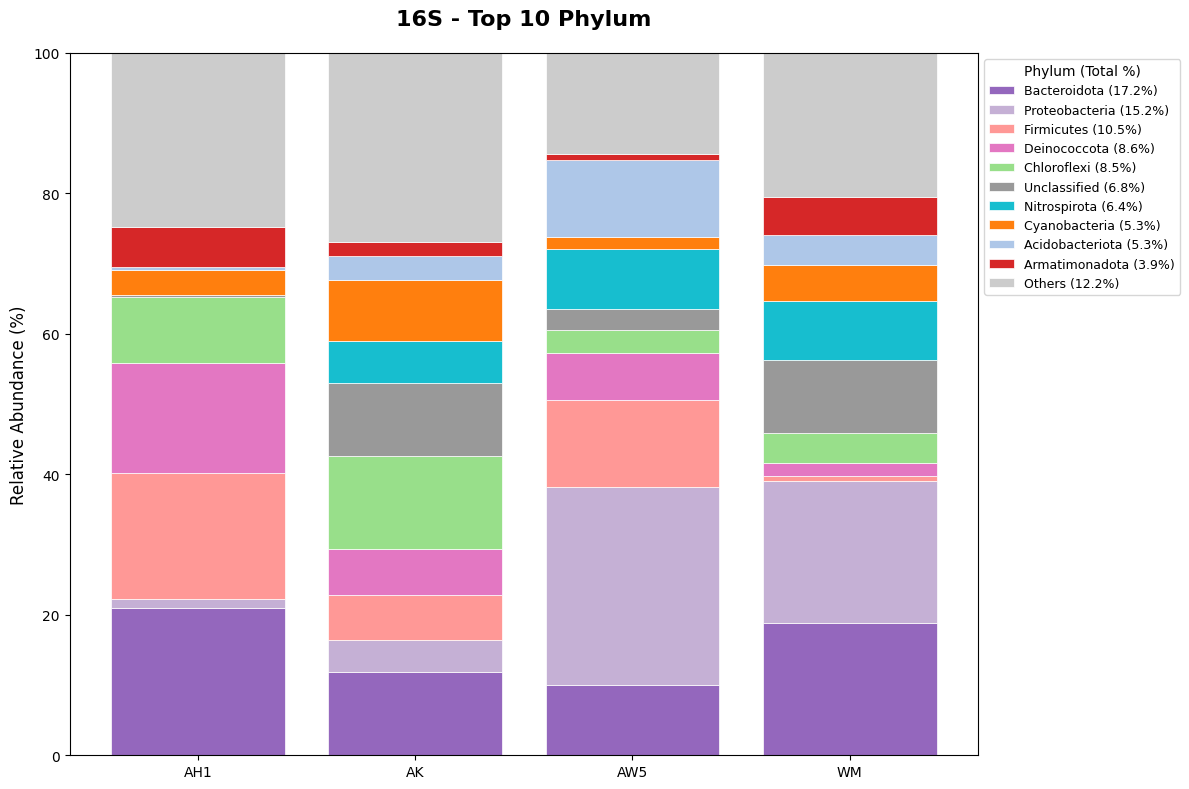

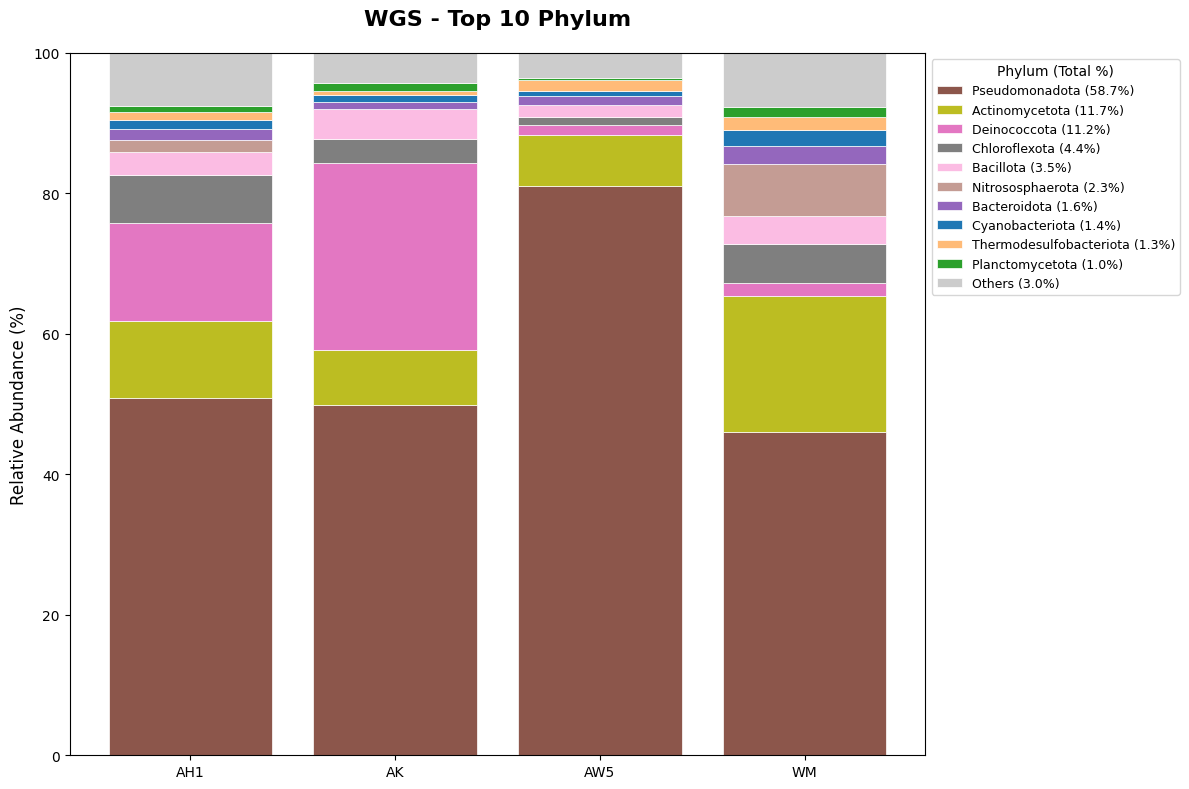


=== Phylum Comparison ===
Shared in Both: Bacteroidota, Deinococcota
Unique to 16S: Cyanobacteria, Armatimonadota, Nitrospirota, Acidobacteriota, Chloroflexi, Firmicutes, Proteobacteria
Unique to WGS: Planctomycetota, Pseudomonadota, Chloroflexota, Actinomycetota, Nitrososphaerota, Thermodesulfobacteriota, Cyanobacteriota, Bacillota


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Phylum.txt'
file_path_wgs = 'WGS_Phylum.txt'
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_phyla(df, top_n=10):
    """Extract top Phyla and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_phyla = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_phyla if p not in ['Unclassified', 'Others']]

# Get Phyla from both datasets
top_16s = get_top_phyla(df_16s)
top_wgs = get_top_phyla(df_wgs)
all_phyla = list(set(top_16s + top_wgs))  # Unique Phyla

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, Phylum in enumerate(all_phyla):
    color_mapping[Phylum] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Phylum (Total %)', fontsize=9)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Phylum', color_mapping)
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Phylum', color_mapping)

# Comparison summary
common_phyla = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Phylum Comparison ===")
print(f"Shared in Both: {', '.join(common_phyla) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

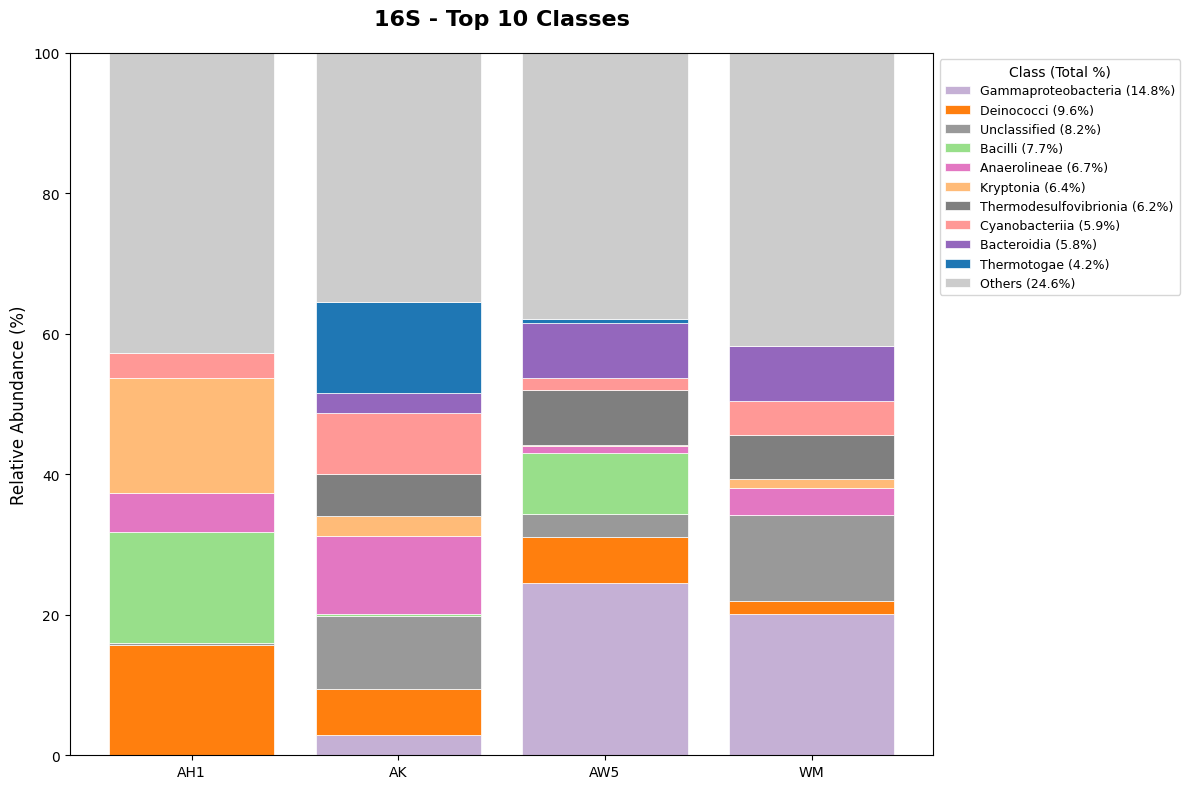

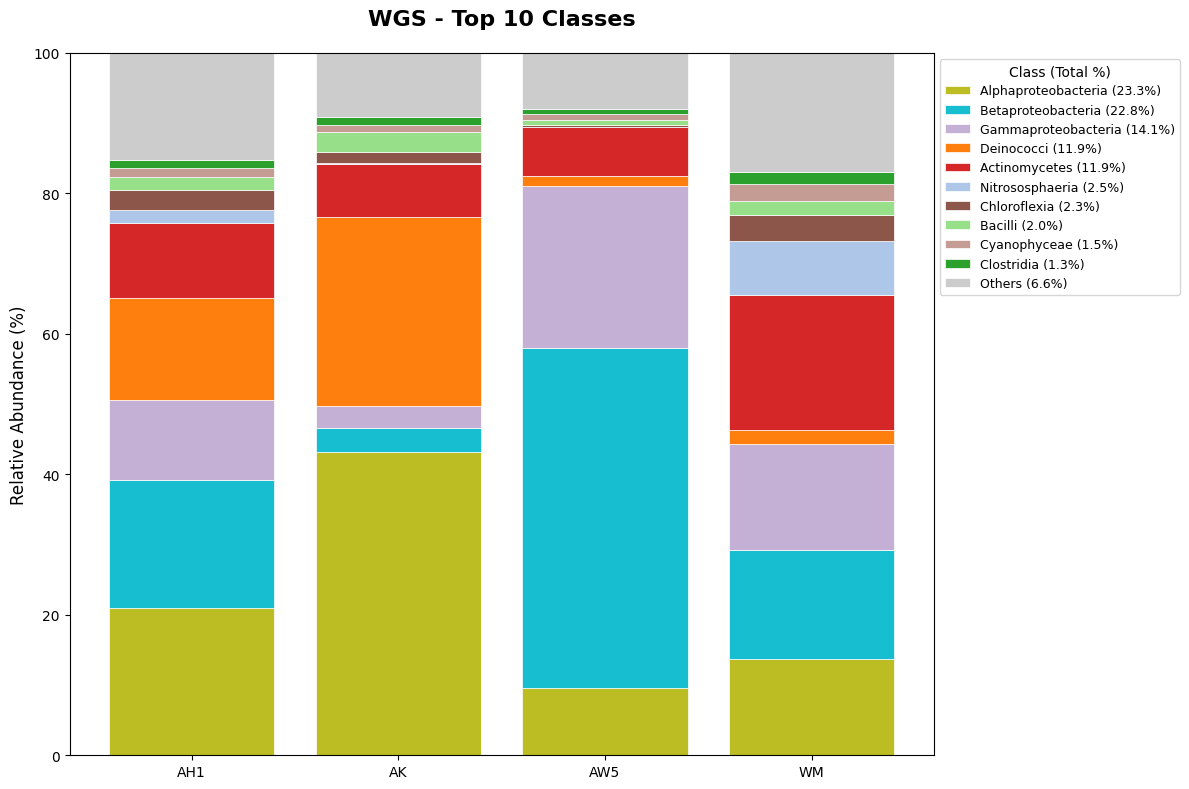


=== Class Comparison ===
Shared in Both: Bacilli, Gammaproteobacteria, Deinococci
Unique to 16S: Thermotogae, Bacteroidia, Thermodesulfovibrionia, Anaerolineae, Cyanobacteriia, Kryptonia
Unique to WGS: Clostridia, Actinomycetes, Chloroflexia, Nitrososphaeria, Alphaproteobacteria, Betaproteobacteria, Cyanophyceae


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Class.txt'  # Changed to Class files
file_path_wgs = 'WGS_Class.txt'   # Changed to Class files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_classes(df, top_n=10):  # Renamed from get_top_phyla
    """Extract top Classes and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_classes = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_classes if p not in ['Unclassified', 'Others']]

# Get Classes from both datasets
top_16s = get_top_classes(df_16s)  # Changed variable names
top_wgs = get_top_classes(df_wgs)
all_classes = list(set(top_16s + top_wgs))  # Unique Classes

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, Class in enumerate(all_classes):  # Changed variable name
    color_mapping[Class] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Class (Total %)', fontsize=9)  # Changed to Class
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Classes', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Classes', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_classes = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Class Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_classes) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

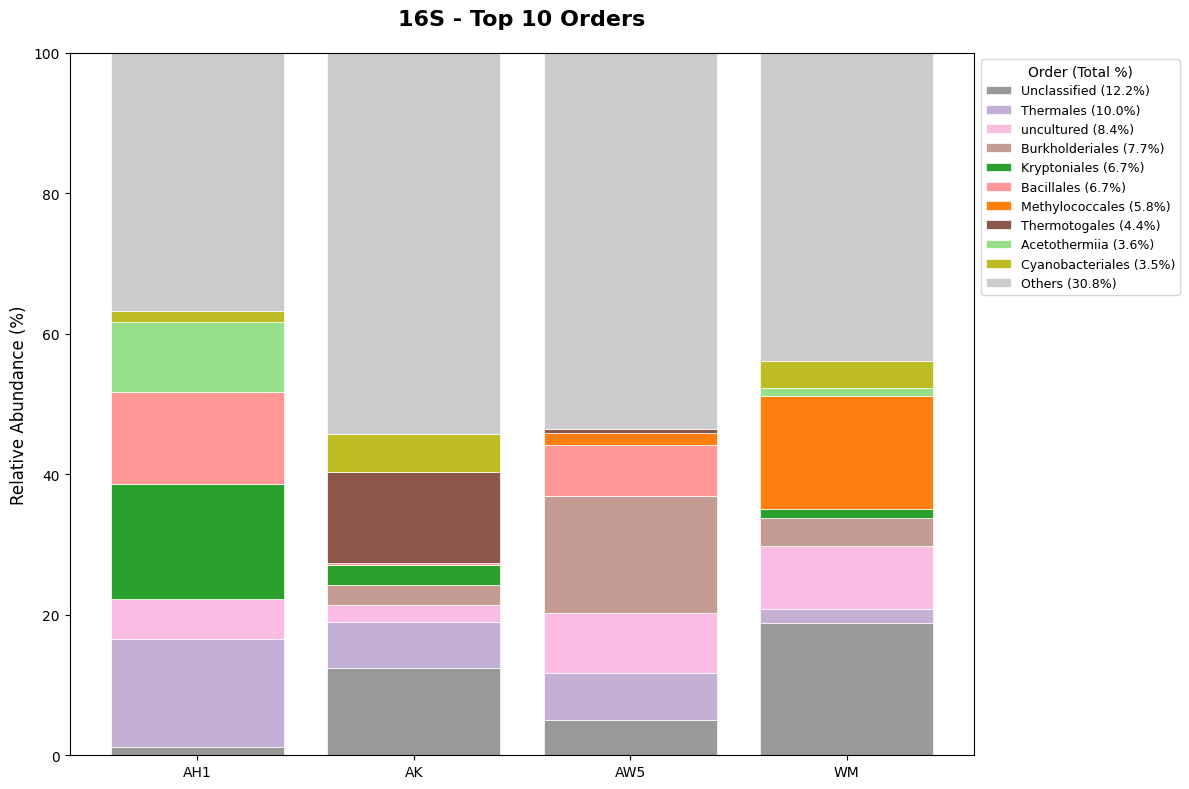

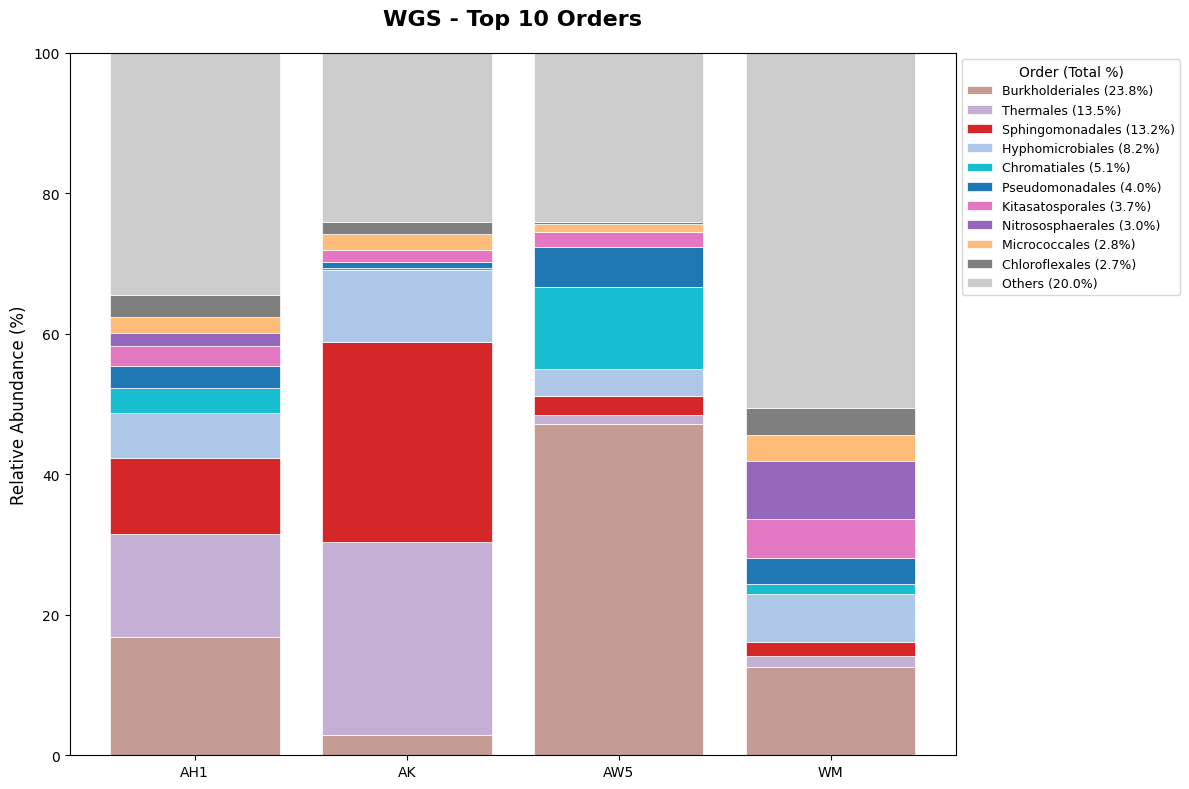


=== Order Comparison ===
Shared in Both: Thermales, Burkholderiales
Unique to 16S: Methylococcales, Kryptoniales, Cyanobacteriales, uncultured, Acetothermiia, Bacillales, Thermotogales
Unique to WGS: Pseudomonadales, Nitrososphaerales, Kitasatosporales, Chloroflexales, Hyphomicrobiales, Micrococcales, Chromatiales, Sphingomonadales


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Order.txt'  # Changed to Order files
file_path_wgs = 'WGS_Order.txt'   # Changed to Order files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_orders(df, top_n=10):  # Renamed from get_top_classes
    """Extract top Orders and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_orders = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_orders if p not in ['Unclassified', 'Others']]

# Get Orders from both datasets
top_16s = get_top_orders(df_16s)  # Changed variable names
top_wgs = get_top_orders(df_wgs)
all_orders = list(set(top_16s + top_wgs))  # Unique Orders

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, order in enumerate(all_orders):  # Changed variable name
    color_mapping[order] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Order (Total %)', fontsize=9)  # Changed to Order
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Orders', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Orders', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_orders = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Order Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_orders) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

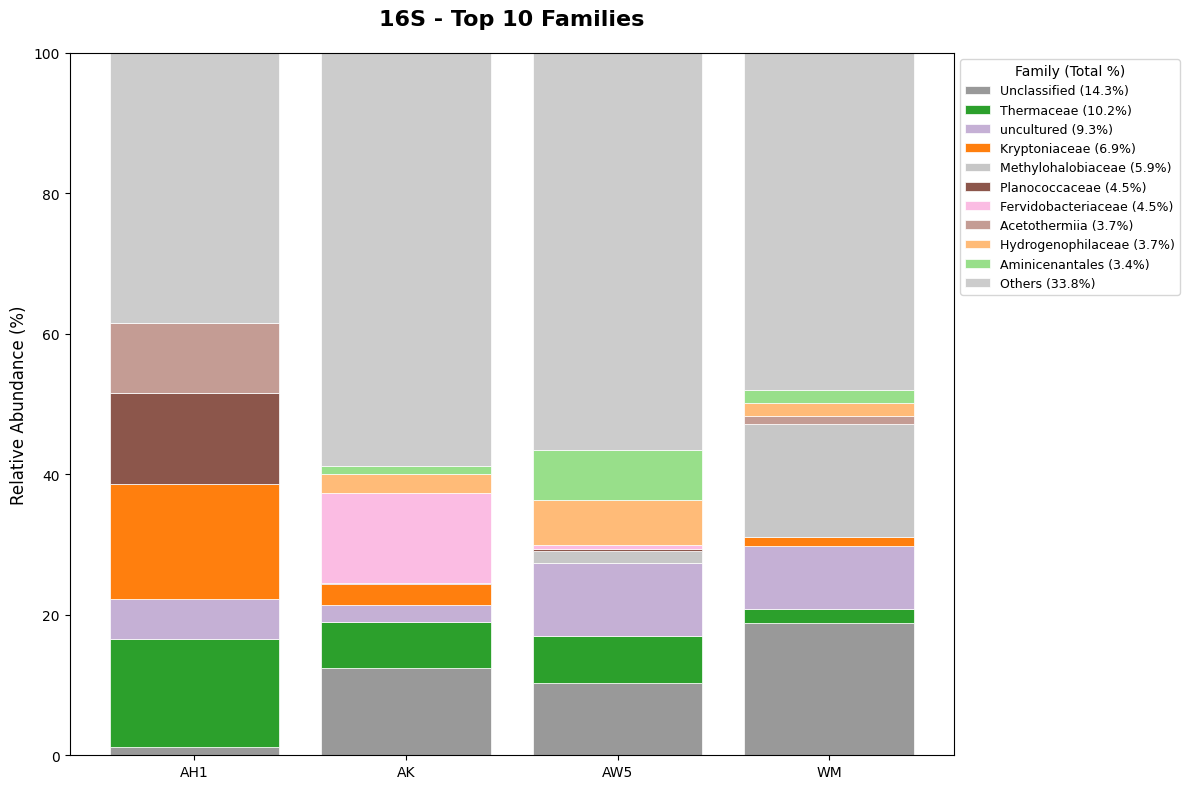

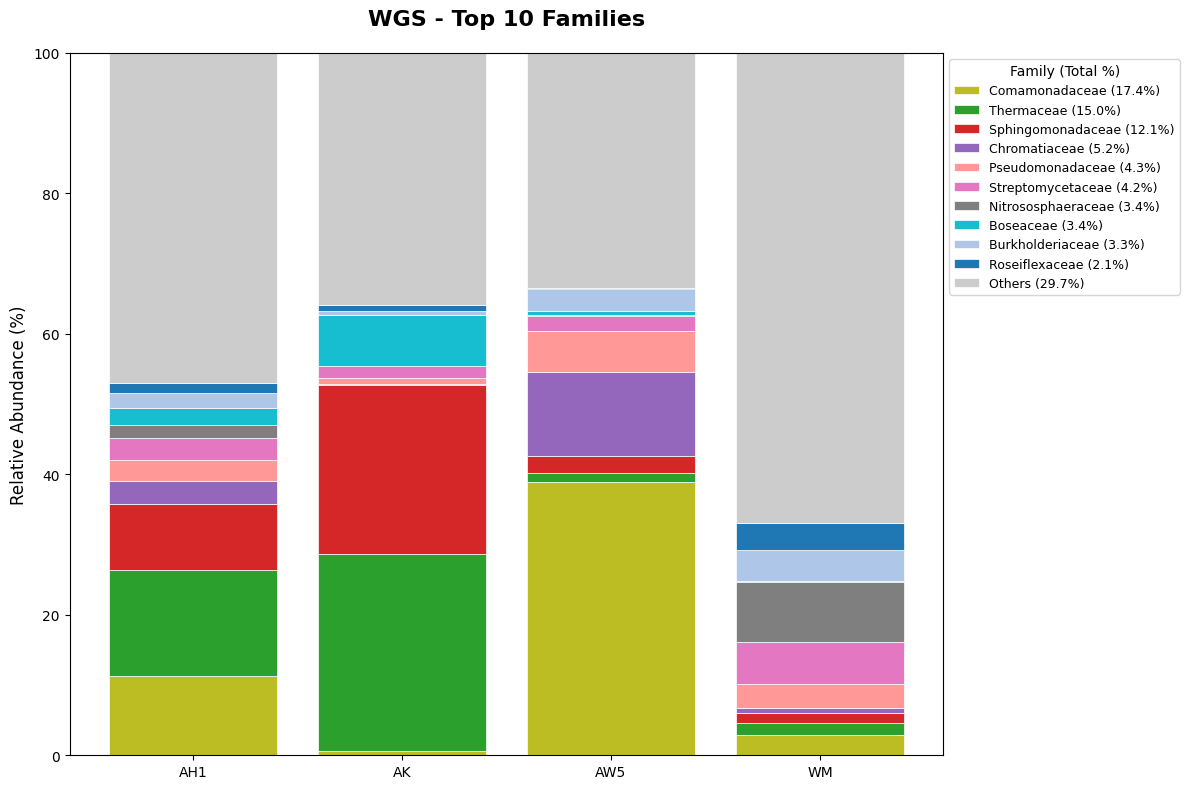


=== Family Comparison ===
Shared in Both: Thermaceae
Unique to 16S: Planococcaceae, Hydrogenophilaceae, Aminicenantales, uncultured, Acetothermiia, Fervidobacteriaceae, Methylohalobiaceae, Kryptoniaceae
Unique to WGS: Roseiflexaceae, Sphingomonadaceae, Boseaceae, Streptomycetaceae, Burkholderiaceae, Comamonadaceae, Pseudomonadaceae, Nitrososphaeraceae, Chromatiaceae


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Family.txt'  # Changed to Family files
file_path_wgs = 'WGS_Family.txt'   # Changed to Family files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_families(df, top_n=10):  # Changed to get_top_families
    """Extract top Families and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_families = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_families if p not in ['Unclassified', 'Others']]

# Get Families from both datasets
top_16s = get_top_families(df_16s)  # Changed variable names
top_wgs = get_top_families(df_wgs)
all_families = list(set(top_16s + top_wgs))  # Unique Families

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, family in enumerate(all_families):  # Changed variable name
    color_mapping[family] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Family (Total %)', fontsize=9)  # Changed to Family
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Families', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Families', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_families = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Family Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_families) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

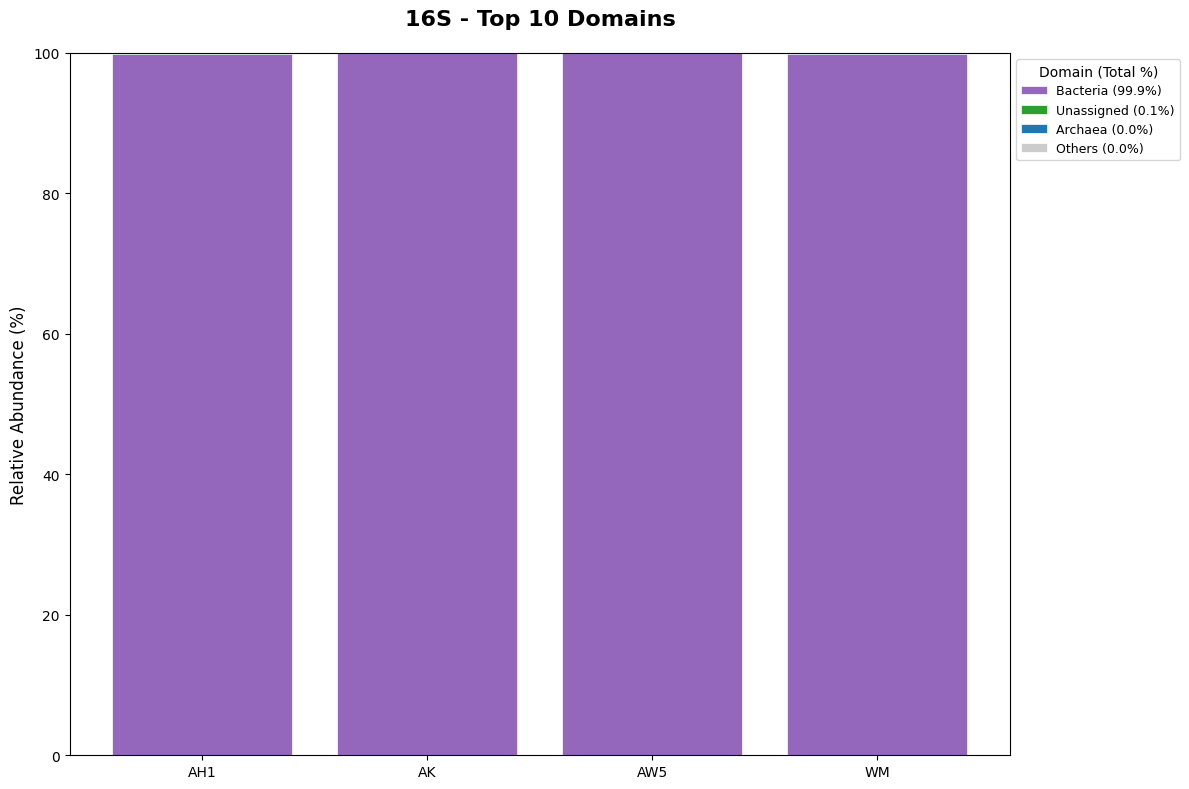

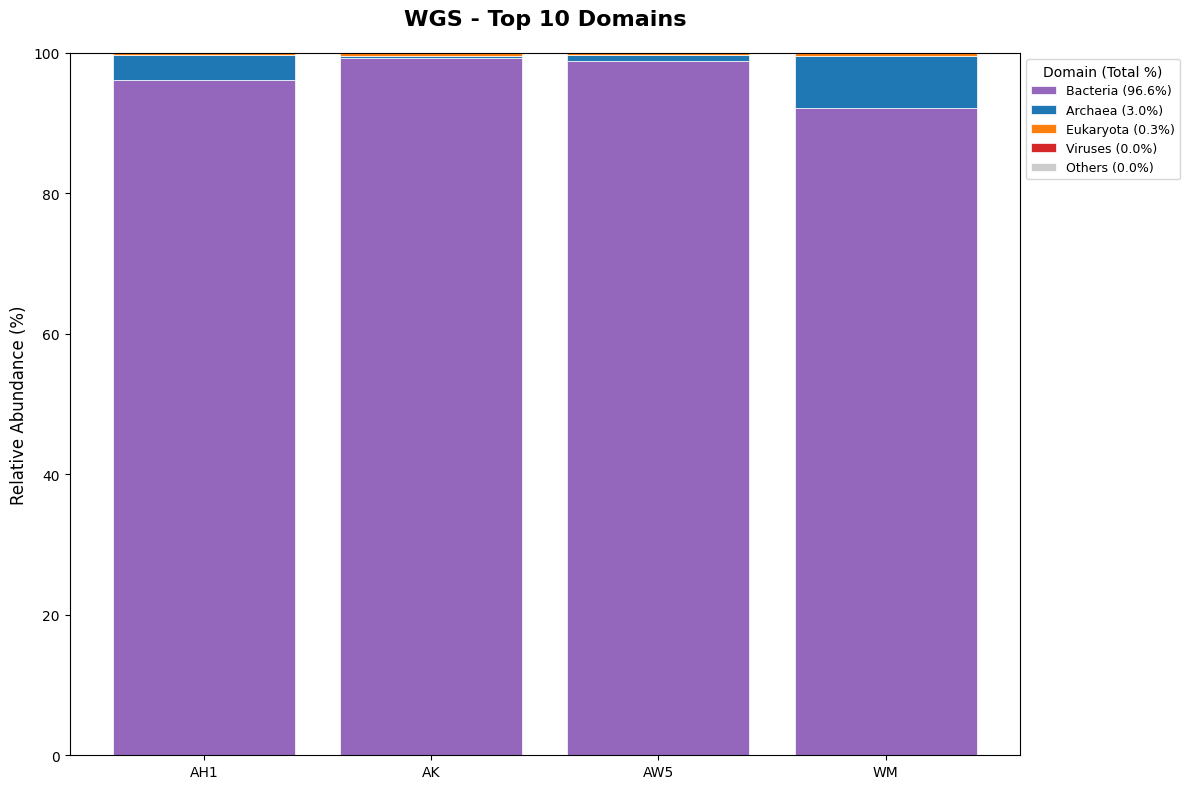


=== Domain Comparison ===
Shared in Both: Bacteria, Archaea
Unique to 16S: Unassigned
Unique to WGS: Eukaryota, Viruses


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Domain.txt'  # Changed to Domain files
file_path_wgs = 'WGS_Domain.txt'   # Changed to Domain files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_domains(df, top_n=10):  # Changed to domains
    """Extract top Domains and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_domains = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_domains if p not in ['Unclassified', 'Others']]

# Get Domains from both datasets
top_16s = get_top_domains(df_16s)  # Changed variable names
top_wgs = get_top_domains(df_wgs)
all_domains = list(set(top_16s + top_wgs))  # Unique Domains

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, domain in enumerate(all_domains):  # Changed variable name
    color_mapping[domain] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Domain (Total %)', fontsize=9)  # Changed to Domain
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Domains', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Domains', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_domains = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Domain Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_domains) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

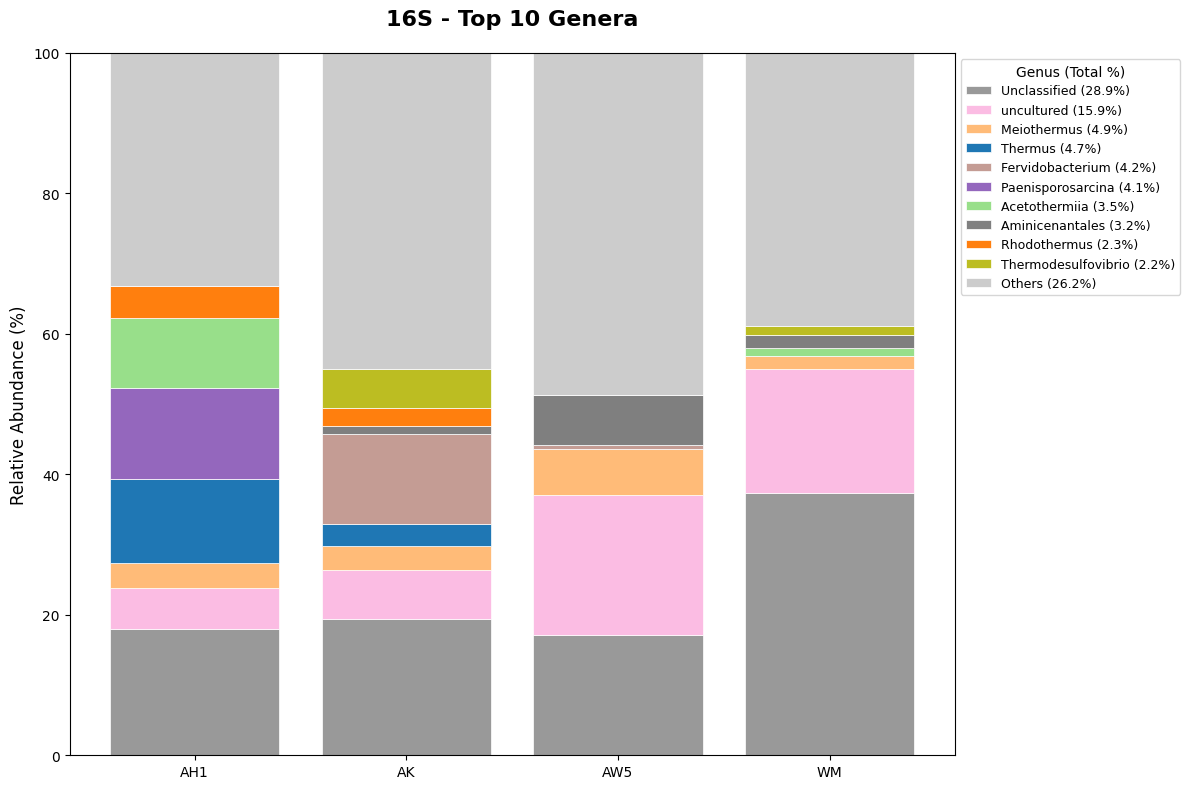

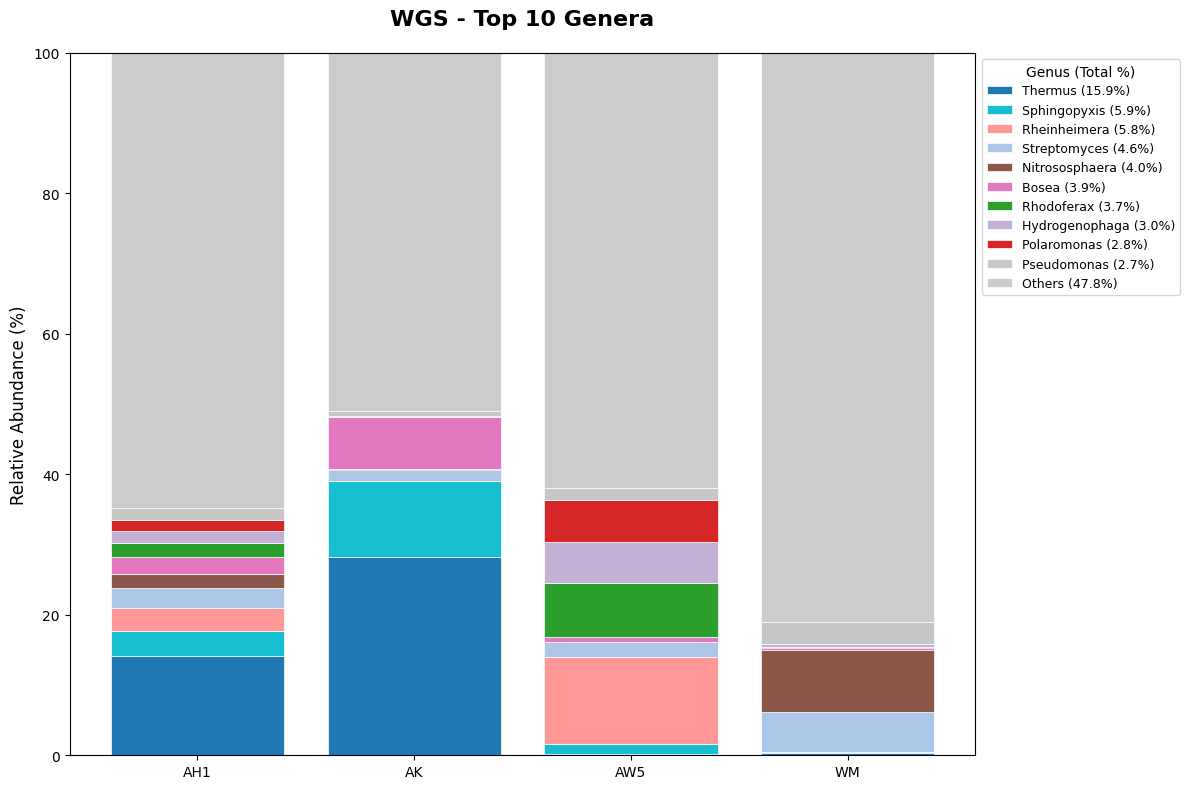


=== Genus Comparison ===
Shared in Both: Thermus
Unique to 16S: Paenisporosarcina, Aminicenantales, Thermodesulfovibrio, Meiothermus, Acetothermiia, uncultured, Fervidobacterium, Rhodothermus
Unique to WGS: Rhodoferax, Polaromonas, Bosea, Sphingopyxis, Rheinheimera, Hydrogenophaga, Nitrososphaera, Streptomyces, Pseudomonas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Genus.txt'  # Changed to Genus files
file_path_wgs = 'WGS_Genus.txt'   # Changed to Genus files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_genera(df, top_n=10):  # Changed to genera
    """Extract top Genera and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_genera = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_genera if p not in ['Unclassified', 'Others']]

# Get Genera from both datasets
top_16s = get_top_genera(df_16s)  # Changed variable names
top_wgs = get_top_genera(df_wgs)
all_genera = list(set(top_16s + top_wgs))  # Unique Genera

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, genus in enumerate(all_genera):  # Changed variable name
    color_mapping[genus] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Genus (Total %)', fontsize=9)  # Changed to Genus
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Genera', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Genera', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_genera = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Genus Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_genera) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

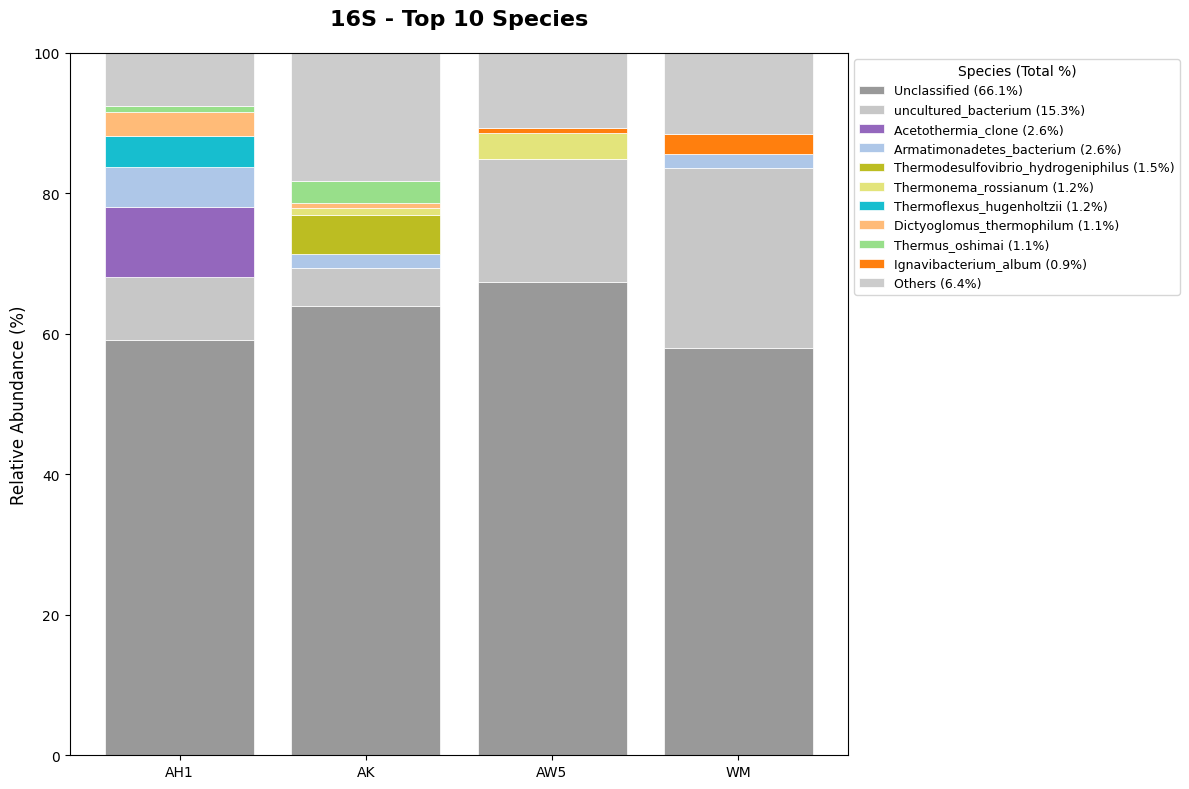

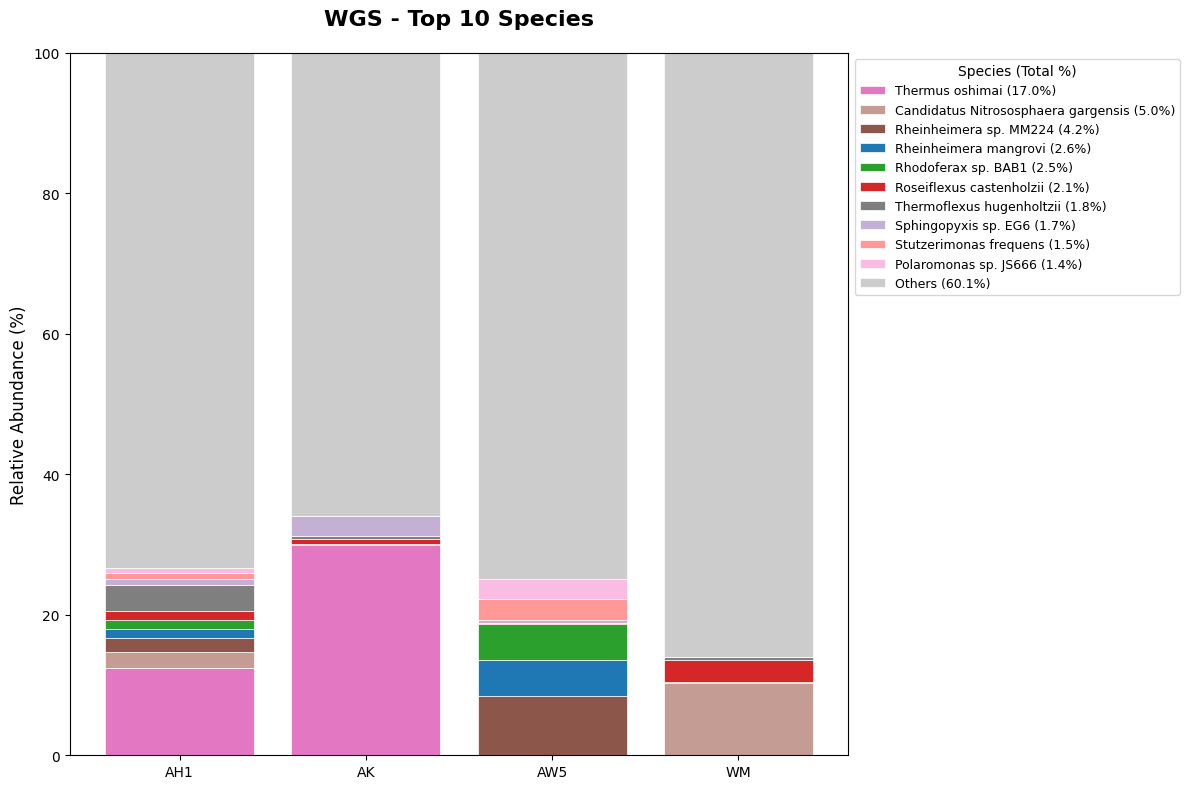


=== Species Comparison ===
Shared in Both: None
Unique to 16S: Thermus_oshimai, Ignavibacterium_album, Thermoflexus_hugenholtzii, uncultured_bacterium, Armatimonadetes_bacterium, Thermodesulfovibrio_hydrogeniphilus, Acetothermia_clone, Thermonema_rossianum, Dictyoglomus_thermophilum
Unique to WGS: Stutzerimonas frequens, Sphingopyxis sp. EG6, Rheinheimera sp. MM224, Candidatus Nitrososphaera gargensis, Rheinheimera mangrovi, Polaromonas sp. JS666, Rhodoferax sp. BAB1, Thermus oshimai, Roseiflexus castenholzii, Thermoflexus hugenholtzii


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Species.txt'  # Changed to Species files
file_path_wgs = 'WGS_Species.txt'   # Changed to Species files
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_species(df, top_n=10):  # Changed to species
    """Extract top Species and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_species = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_species if p not in ['Unclassified', 'Others']]

# Get Species from both datasets
top_16s = get_top_species(df_16s)  # Changed variable names
top_wgs = get_top_species(df_wgs)
all_species = list(set(top_16s + top_wgs))  # Unique Species

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, species in enumerate(all_species):  # Changed variable name
    color_mapping[species] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    bottom = np.zeros(len(samples))

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')  # Default to gray
        ax.bar(
            samples, row[samples], bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5
        )
        bottom += row[samples]

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Species (Total %)', fontsize=9)  # Changed to Species
    plt.tight_layout()
    plt.show()

# Generate plots (updated titles)
plot_stacked_bar(df_16s.copy(), '16S - Top 10 Species', color_mapping)  # Changed title
plot_stacked_bar(df_wgs.copy(), 'WGS - Top 10 Species', color_mapping)  # Changed title

# Comparison summary (updated labels)
common_species = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Species Comparison ===")  # Changed header
print(f"Shared in Both: {', '.join(common_species) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

#Series lines

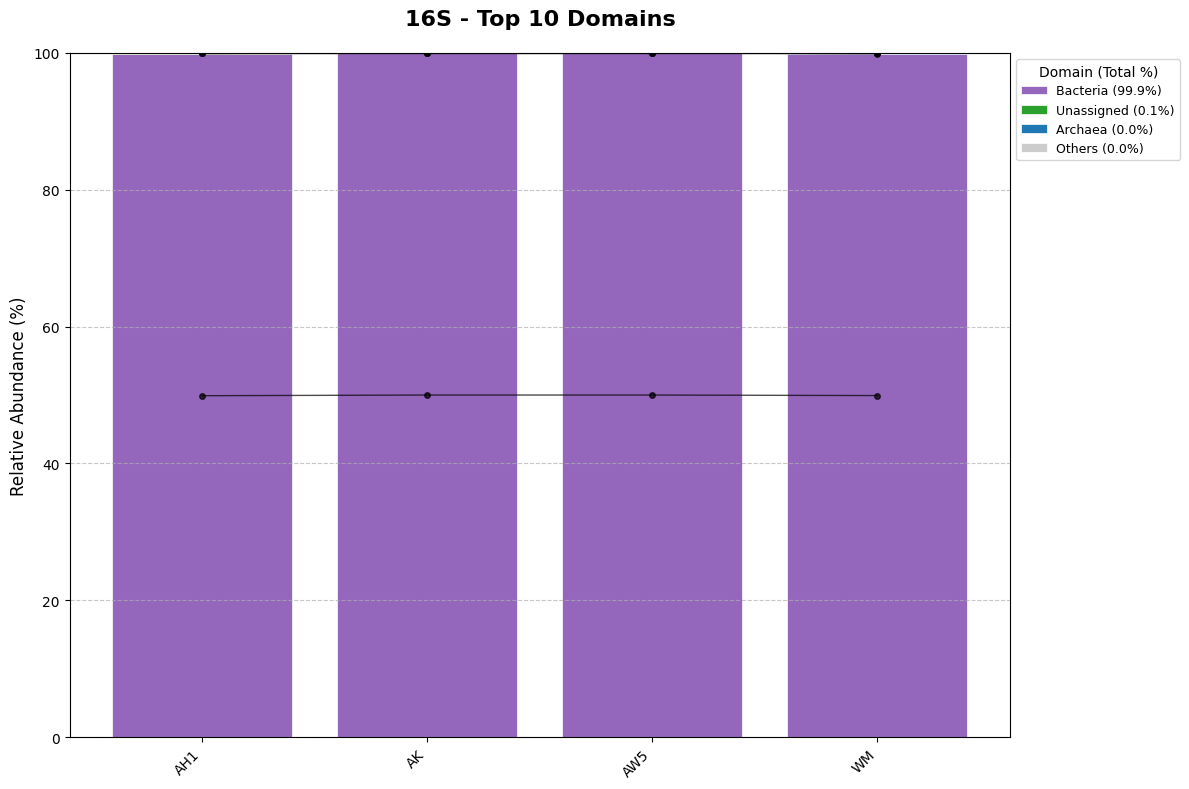

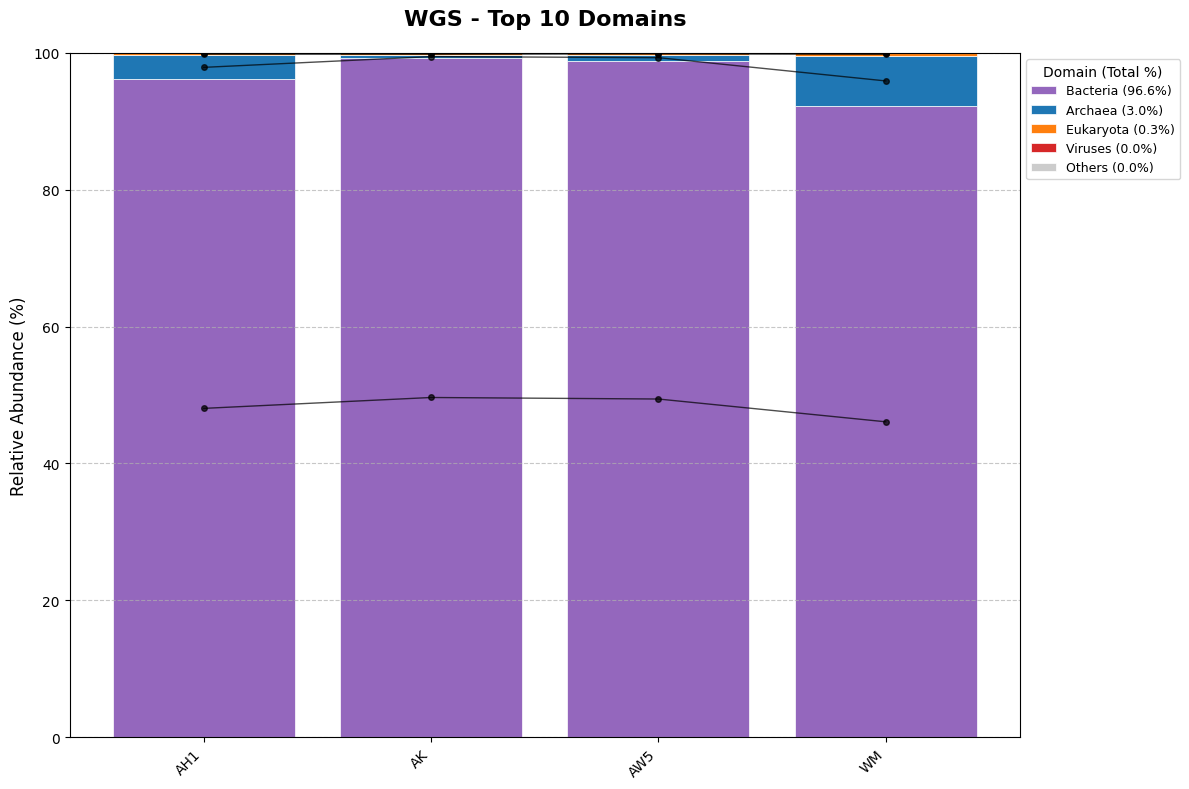


=== Domain Comparison ===
Shared in Both: Bacteria, Archaea
Unique to 16S: Unassigned
Unique to WGS: Eukaryota, Viruses


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Domain.txt'
file_path_wgs = 'WGS_Domain.txt'
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_domains(df, top_n=10):
    """Extract top Domains and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_domains = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_domains if p not in ['Unclassified', 'Others']]

# Get Domains from both datasets
top_16s = get_top_domains(df_16s)
top_wgs = get_top_domains(df_wgs)
all_domains = list(set(top_16s + top_wgs))  # Unique Domains

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, domain in enumerate(all_domains):
    color_mapping[domain] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each domain
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each domain
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each domain
    for domain, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Domain (Total %)', fontsize=9)
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Domains', color_mapping)
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Domains', color_mapping)

# Comparison summary
common_domains = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Domain Comparison ===")
print(f"Shared in Both: {', '.join(common_domains) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

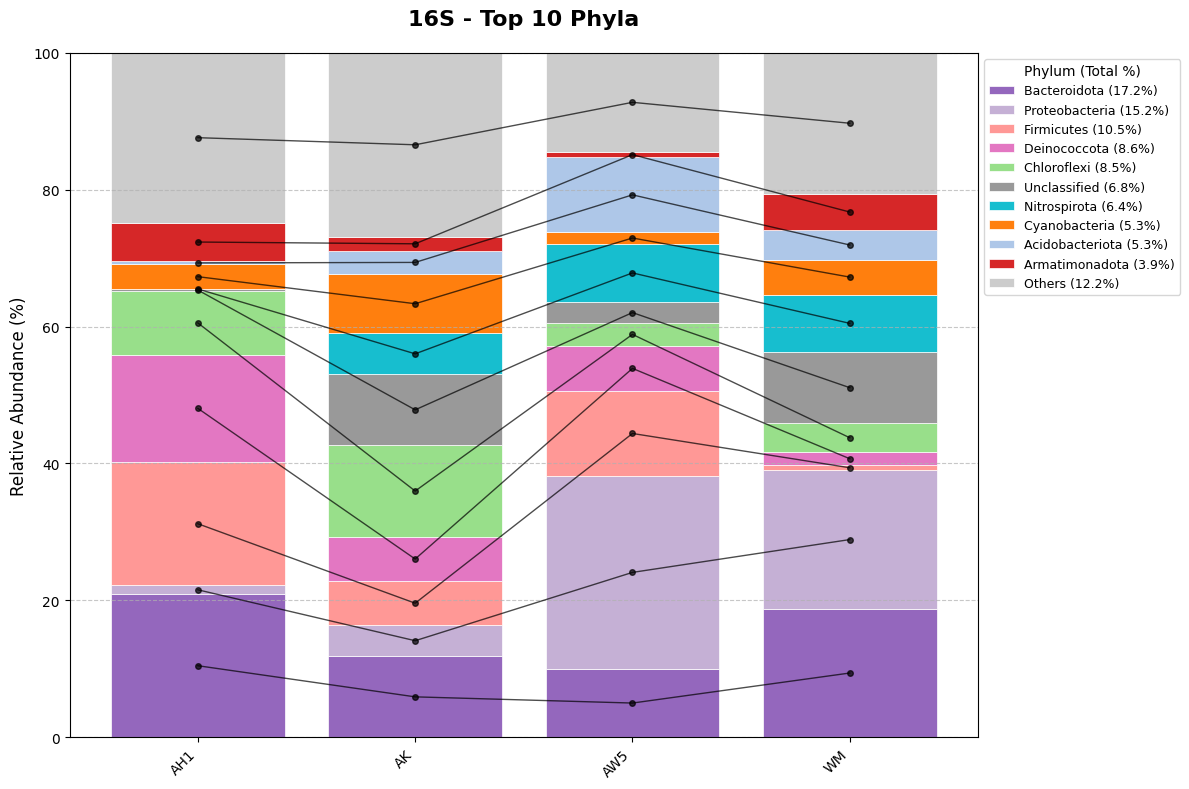

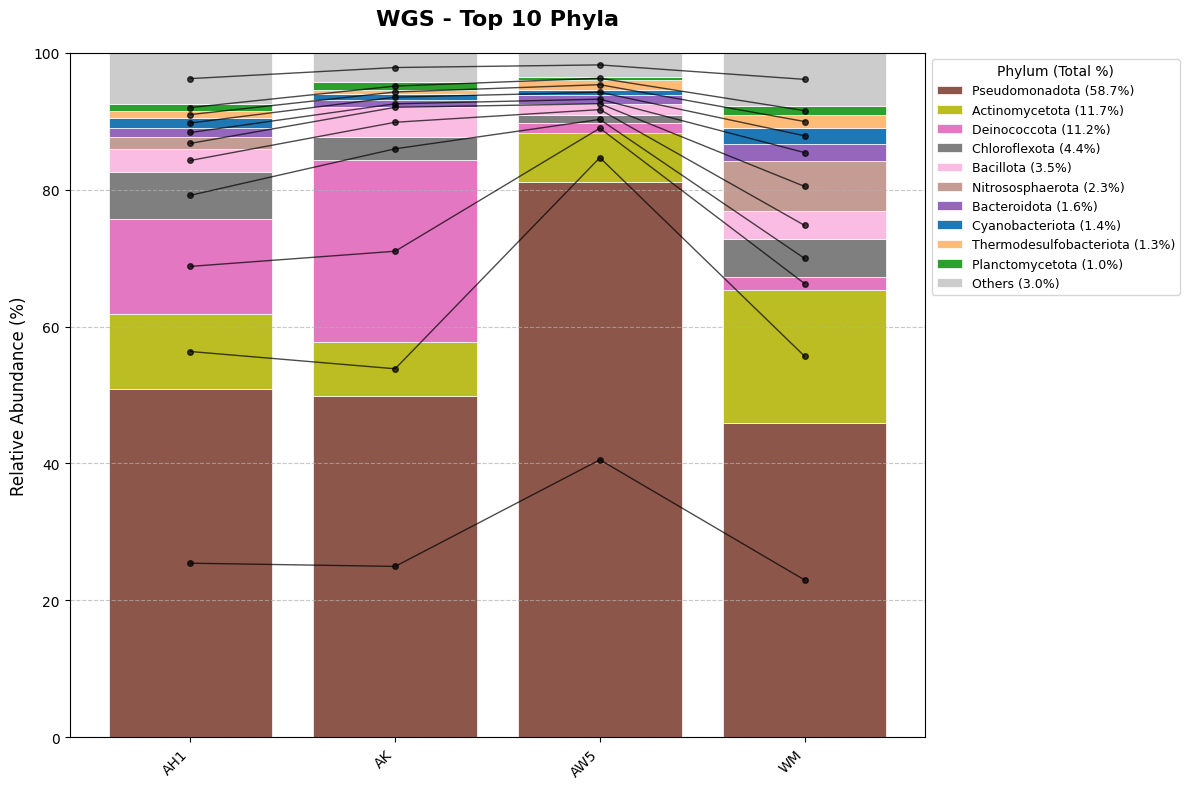


=== Phylum Comparison ===
Shared in Both: Bacteroidota, Deinococcota
Unique to 16S: Cyanobacteria, Armatimonadota, Nitrospirota, Acidobacteriota, Chloroflexi, Firmicutes, Proteobacteria
Unique to WGS: Planctomycetota, Pseudomonadota, Chloroflexota, Actinomycetota, Nitrososphaerota, Thermodesulfobacteriota, Cyanobacteriota, Bacillota


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Phylum.txt'
file_path_wgs = 'WGS_Phylum.txt'
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_phyla(df, top_n=10):
    """Extract top Phyla and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_phyla = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_phyla if p not in ['Unclassified', 'Others']]

# Get Phyla from both datasets
top_16s = get_top_phyla(df_16s)
top_wgs = get_top_phyla(df_wgs)
all_phyla = list(set(top_16s + top_wgs))  # Unique Phyla

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, phylum in enumerate(all_phyla):
    color_mapping[phylum] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each phylum
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each phylum
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each phylum
    for phylum, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Phylum (Total %)', fontsize=9)
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Phyla', color_mapping)
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Phyla', color_mapping)

# Comparison summary
common_phyla = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Phylum Comparison ===")
print(f"Shared in Both: {', '.join(common_phyla) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

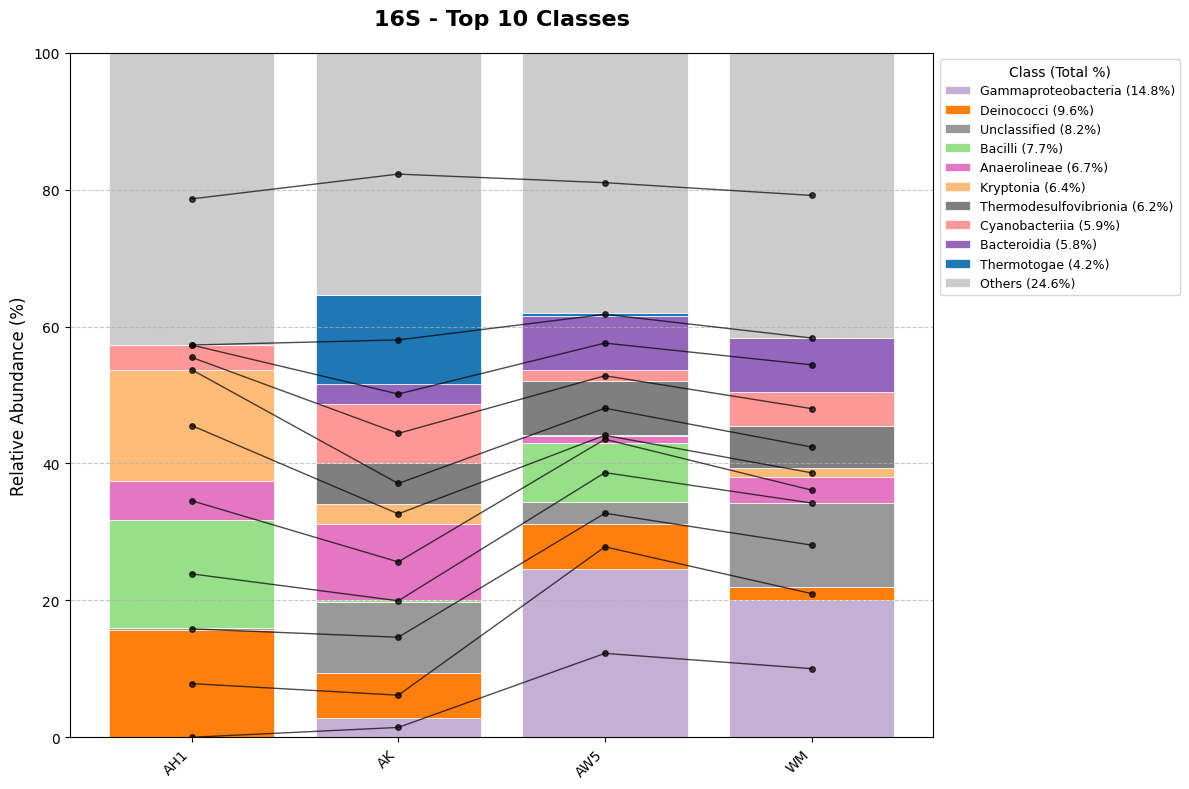

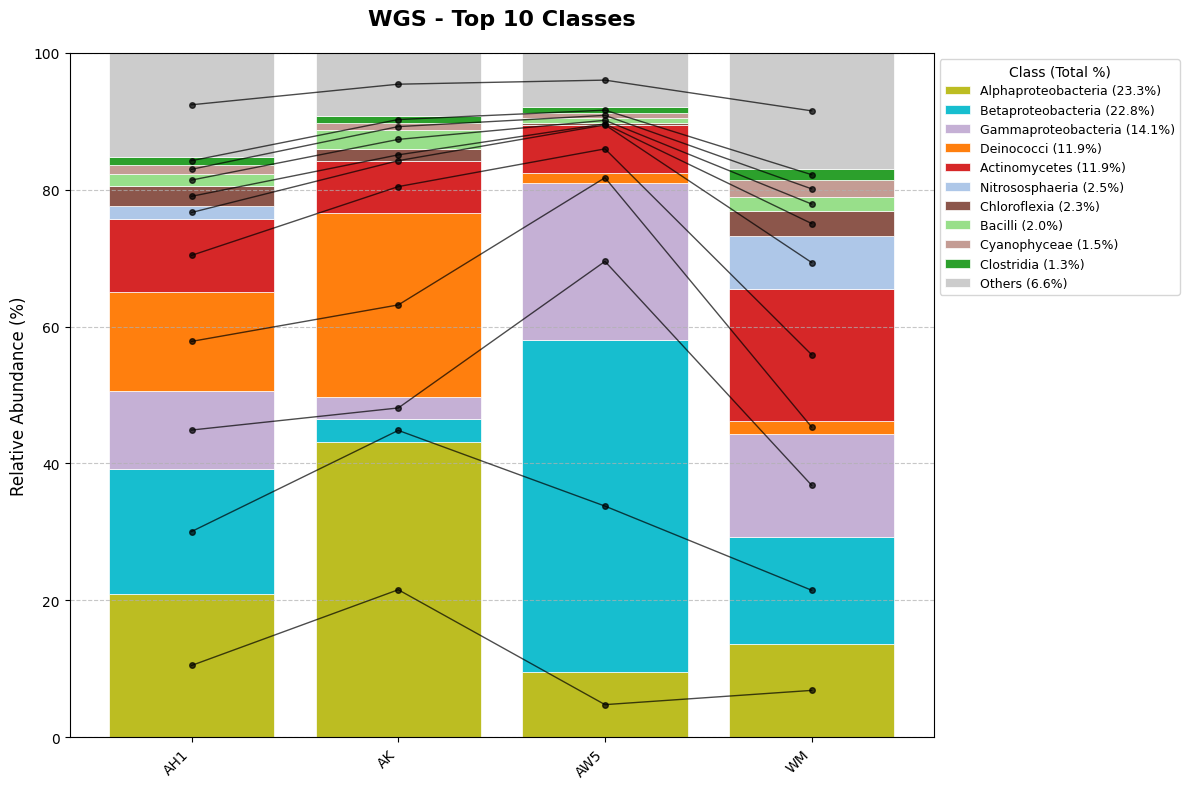


=== Class Comparison ===
Shared in Both: Bacilli, Gammaproteobacteria, Deinococci
Unique to 16S: Thermotogae, Bacteroidia, Thermodesulfovibrionia, Anaerolineae, Cyanobacteriia, Kryptonia
Unique to WGS: Clostridia, Actinomycetes, Chloroflexia, Nitrososphaeria, Alphaproteobacteria, Betaproteobacteria, Cyanophyceae


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Class.txt'
file_path_wgs = 'WGS_Class.txt'
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_classes(df, top_n=10):
    """Extract top Classes and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_classes = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_classes if p not in ['Unclassified', 'Others']]

# Get Classes from both datasets
top_16s = get_top_classes(df_16s)
top_wgs = get_top_classes(df_wgs)
all_classes = list(set(top_16s + top_wgs))  # Unique Classes

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, class_ in enumerate(all_classes):
    color_mapping[class_] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each class
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each class
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each class
    for class_, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Class (Total %)', fontsize=9)
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Classes', color_mapping)
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Classes', color_mapping)

# Comparison summary
common_classes = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Class Comparison ===")
print(f"Shared in Both: {', '.join(common_classes) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

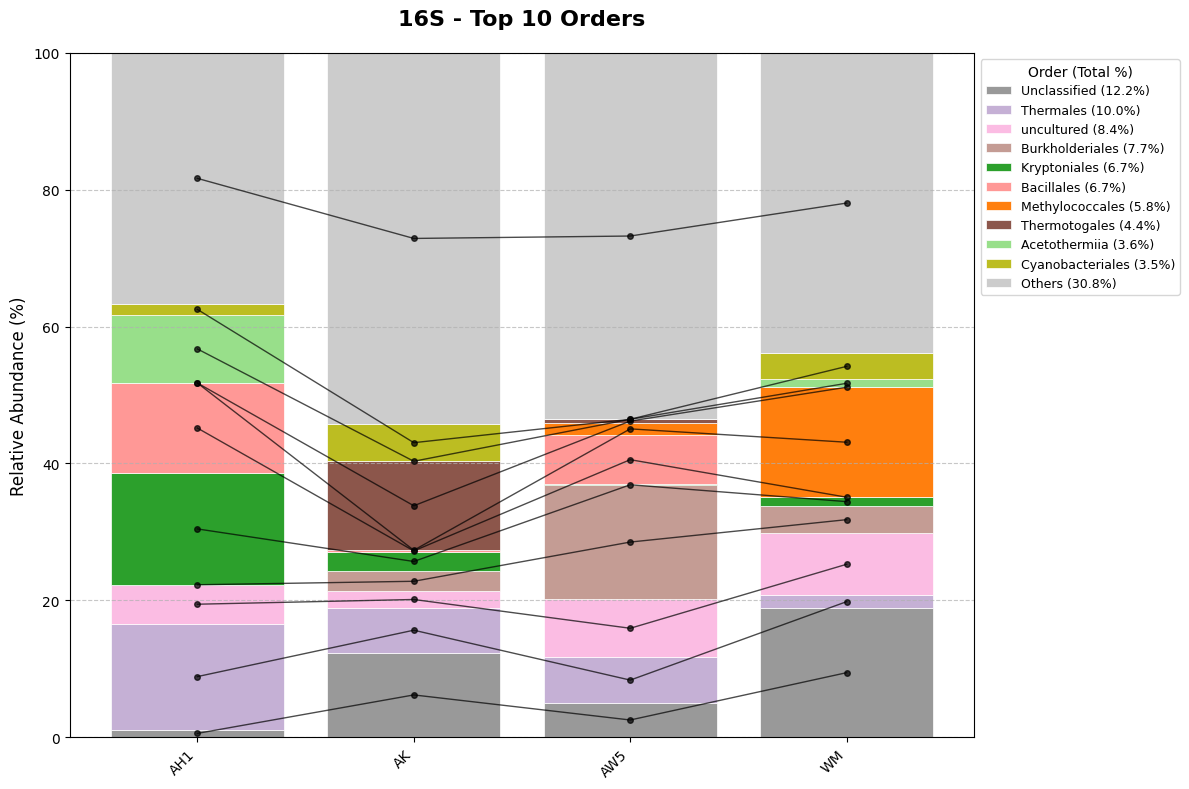

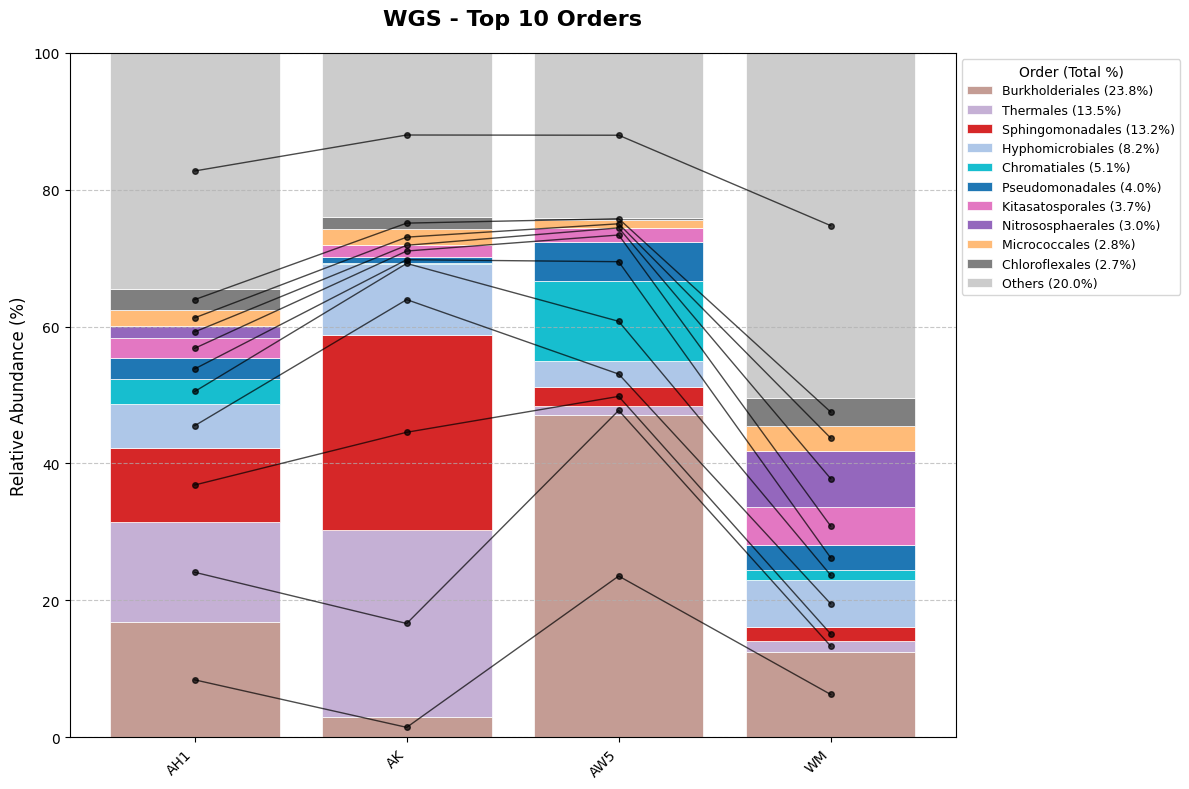


=== Order Comparison ===
Shared in Both: Thermales, Burkholderiales
Unique to 16S: Methylococcales, Kryptoniales, Cyanobacteriales, uncultured, Acetothermiia, Bacillales, Thermotogales
Unique to WGS: Pseudomonadales, Nitrososphaerales, Kitasatosporales, Chloroflexales, Hyphomicrobiales, Micrococcales, Chromatiales, Sphingomonadales


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Order.txt'  # Changed to Order file
file_path_wgs = 'WGS_Order.txt'  # Changed to Order file
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_orders(df, top_n=10):  # Changed from get_top_classes to get_top_orders
    """Extract top Orders and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_orders = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_orders if p not in ['Unclassified', 'Others']]

# Get Orders from both datasets
top_16s = get_top_orders(df_16s)  # Changed from top_classes to top_orders
top_wgs = get_top_orders(df_wgs)   # Changed from top_classes to top_orders
all_orders = list(set(top_16s + top_wgs))  # Unique Orders

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, order in enumerate(all_orders):  # Changed from class_ to order
    color_mapping[order] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each order
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each order
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each order
    for order, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Order (Total %)', fontsize=9)  # Changed from Class to Order
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Orders', color_mapping)  # Changed title
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Orders', color_mapping)   # Changed title

# Comparison summary
common_orders = set(top_16s).intersection(top_wgs)  # Changed from common_classes
unique_to_16s = set(top_16s) - set(top_wgs)        # Changed from unique_to_16s
unique_to_wgs = set(top_wgs) - set(top_16s)        # Changed from unique_to_wgs

print("\n=== Order Comparison ===")  # Changed from Class Comparison
print(f"Shared in Both: {', '.join(common_orders) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

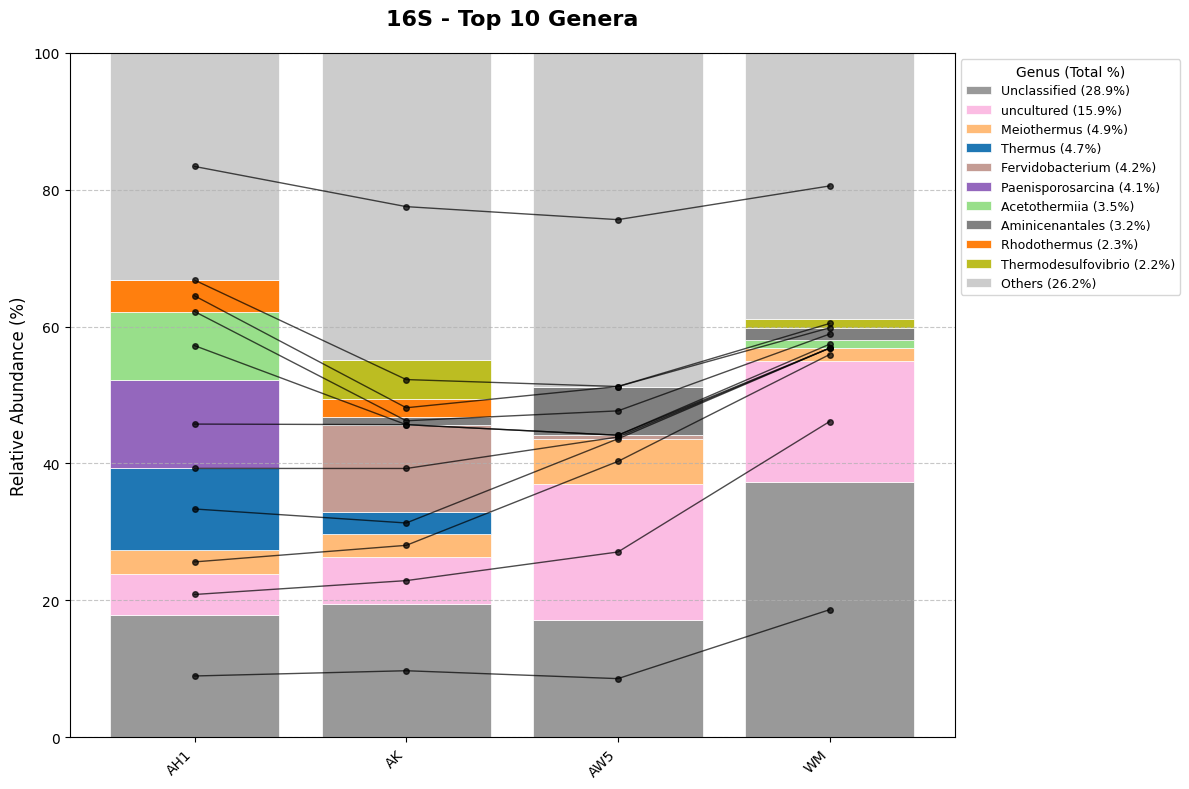

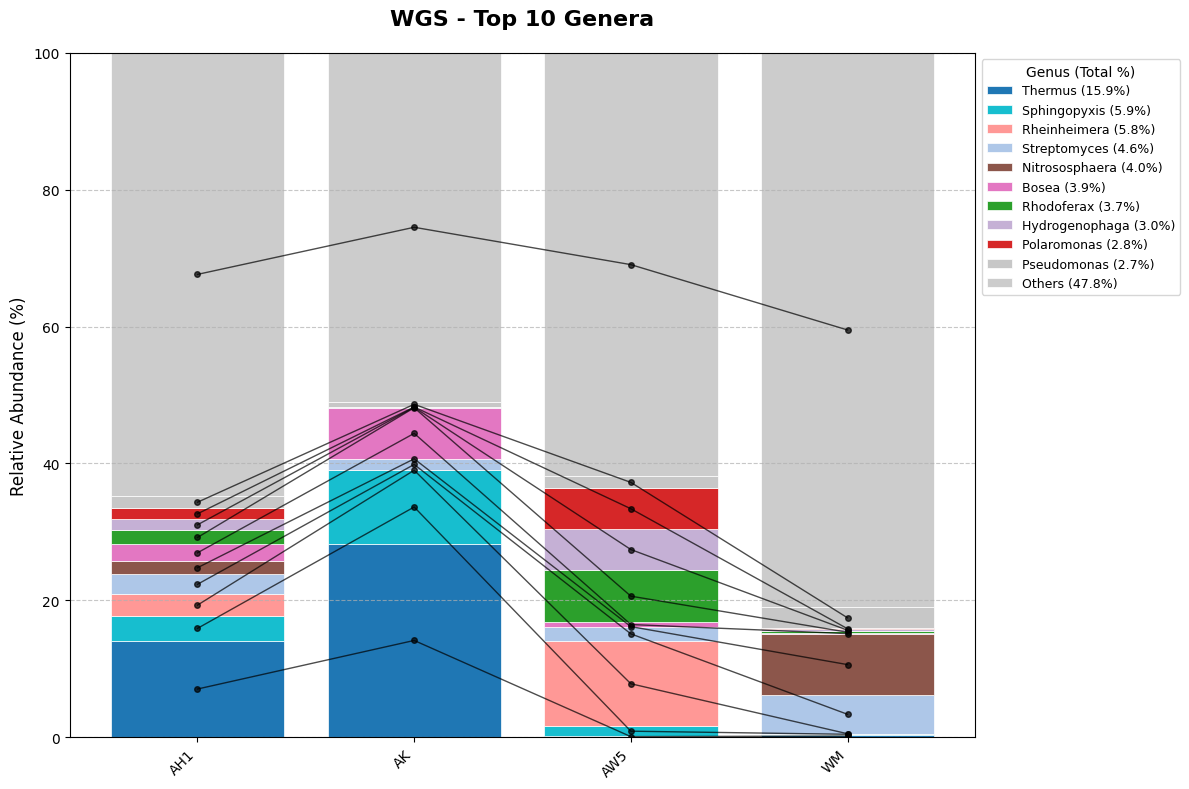


=== Genus Comparison ===
Shared in Both: Thermus
Unique to 16S: Paenisporosarcina, Aminicenantales, Thermodesulfovibrio, Meiothermus, Acetothermiia, uncultured, Fervidobacterium, Rhodothermus
Unique to WGS: Rhodoferax, Polaromonas, Bosea, Sphingopyxis, Rheinheimera, Hydrogenophaga, Nitrososphaera, Streptomyces, Pseudomonas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Genus.txt'  # Changed to Genus file
file_path_wgs = 'WGS_Genus.txt'  # Changed to Genus file
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_genera(df, top_n=10):  # Changed to get_top_genera
    """Extract top Genera and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_genera = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_genera if p not in ['Unclassified', 'Others']]

# Get Genera from both datasets
top_16s = get_top_genera(df_16s)  # Changed to top_genera
top_wgs = get_top_genera(df_wgs)   # Changed to top_genera
all_genera = list(set(top_16s + top_wgs))  # Unique Genera

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, genus in enumerate(all_genera):  # Changed to genus
    color_mapping[genus] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each genus
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each genus
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each genus
    for genus, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Genus (Total %)', fontsize=9)  # Changed to Genus
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Genera', color_mapping)  # Changed title
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Genera', color_mapping)   # Changed title

# Comparison summary
common_genera = set(top_16s).intersection(top_wgs)  # Changed to common_genera
unique_to_16s = set(top_16s) - set(top_wgs)        # Changed to unique_to_16s
unique_to_wgs = set(top_wgs) - set(top_16s)        # Changed to unique_to_wgs

print("\n=== Genus Comparison ===")  # Changed to Genus Comparison
print(f"Shared in Both: {', '.join(common_genera) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

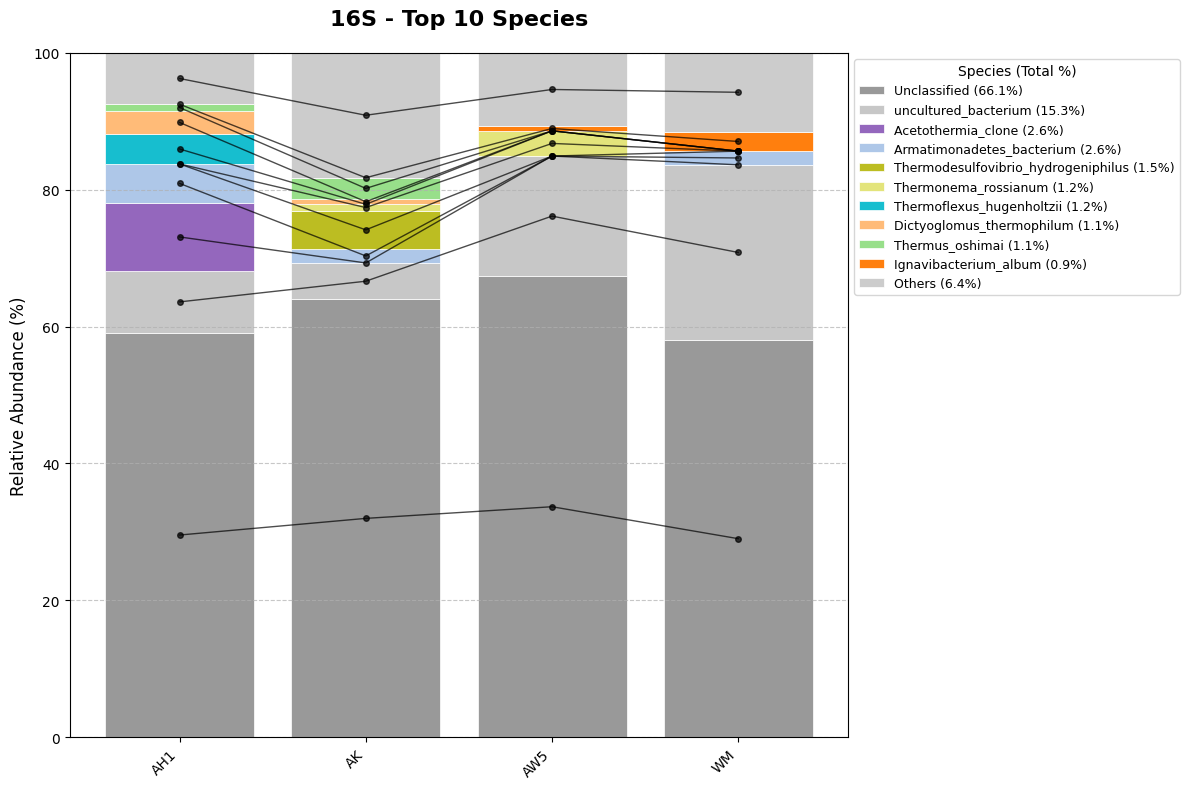

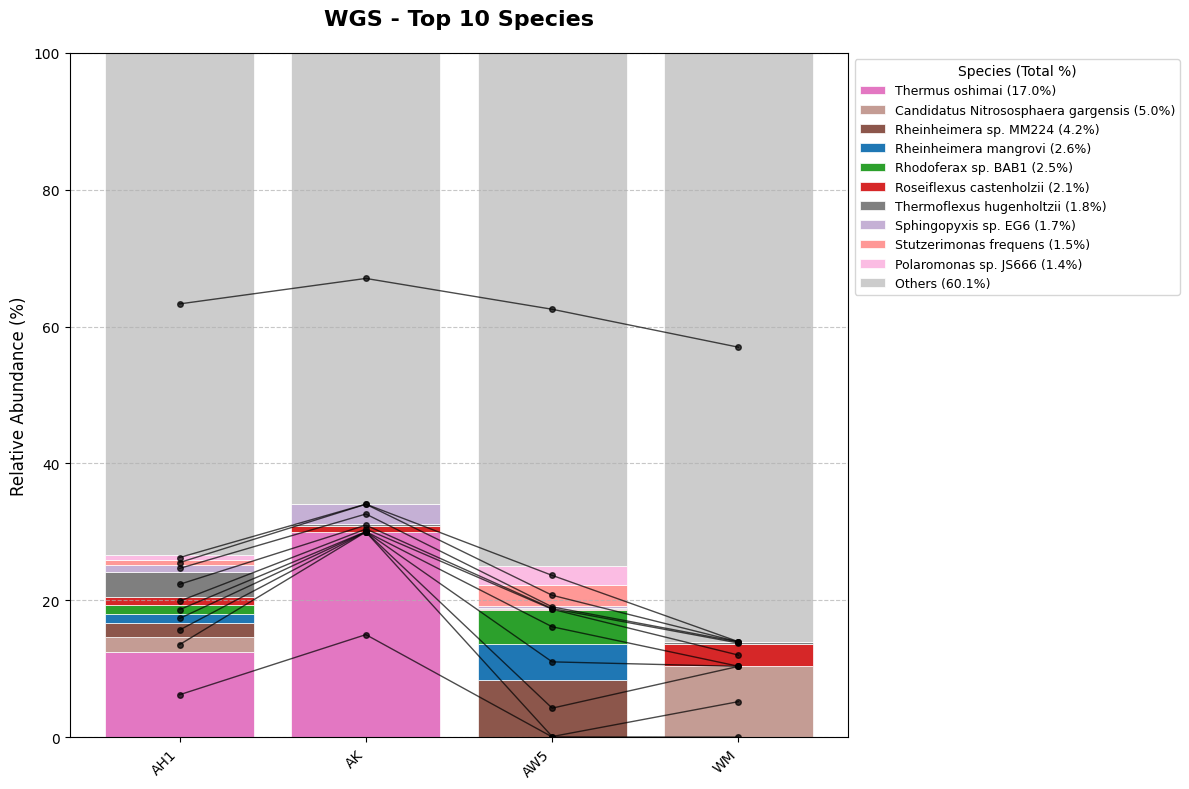


=== Species Comparison ===
Shared in Both: None
Unique to 16S: Thermus_oshimai, Ignavibacterium_album, Thermoflexus_hugenholtzii, uncultured_bacterium, Armatimonadetes_bacterium, Thermodesulfovibrio_hydrogeniphilus, Acetothermia_clone, Thermonema_rossianum, Dictyoglomus_thermophilum
Unique to WGS: Stutzerimonas frequens, Sphingopyxis sp. EG6, Rheinheimera sp. MM224, Candidatus Nitrososphaera gargensis, Rheinheimera mangrovi, Polaromonas sp. JS666, Rhodoferax sp. BAB1, Thermus oshimai, Roseiflexus castenholzii, Thermoflexus hugenholtzii


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Species.txt'  # Changed to Species file
file_path_wgs = 'WGS_Species.txt'  # Changed to Species file
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_species(df, top_n=10):  # Changed to get_top_species
    """Extract top Species and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_species = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_species if p not in ['Unclassified', 'Others']]

# Get Species from both datasets
top_16s = get_top_species(df_16s)  # Changed to top_species
top_wgs = get_top_species(df_wgs)   # Changed to top_species
all_species = list(set(top_16s + top_wgs))  # Unique Species

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, species in enumerate(all_species):  # Changed to species
    color_mapping[species] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each species
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each species
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each species
    for species, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Species (Total %)', fontsize=9)  # Changed to Species
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Species', color_mapping)  # Changed title
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Species', color_mapping)   # Changed title

# Comparison summary
common_species = set(top_16s).intersection(top_wgs)  # Changed to common_species
unique_to_16s = set(top_16s) - set(top_wgs)         # Changed to unique_to_16s
unique_to_wgs = set(top_wgs) - set(top_16s)         # Changed to unique_to_wgs

print("\n=== Species Comparison ===")  # Changed to Species Comparison
print(f"Shared in Both: {', '.join(common_species) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

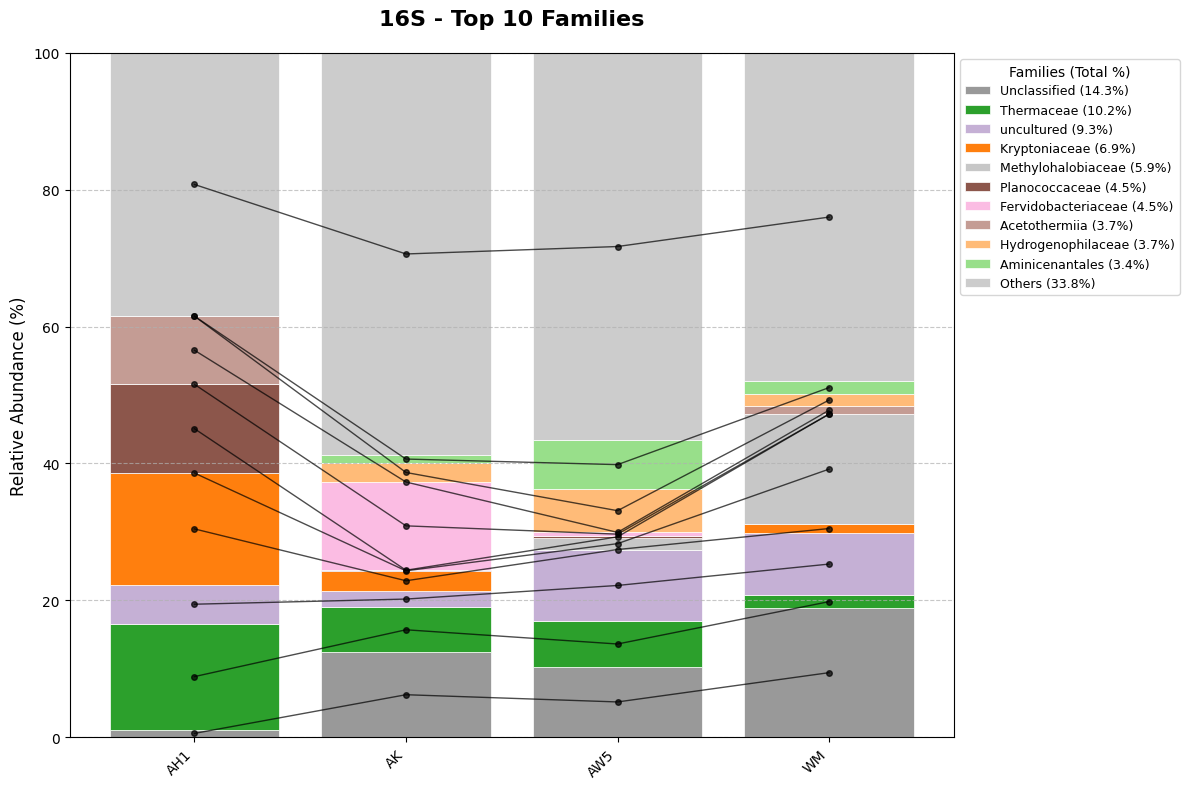

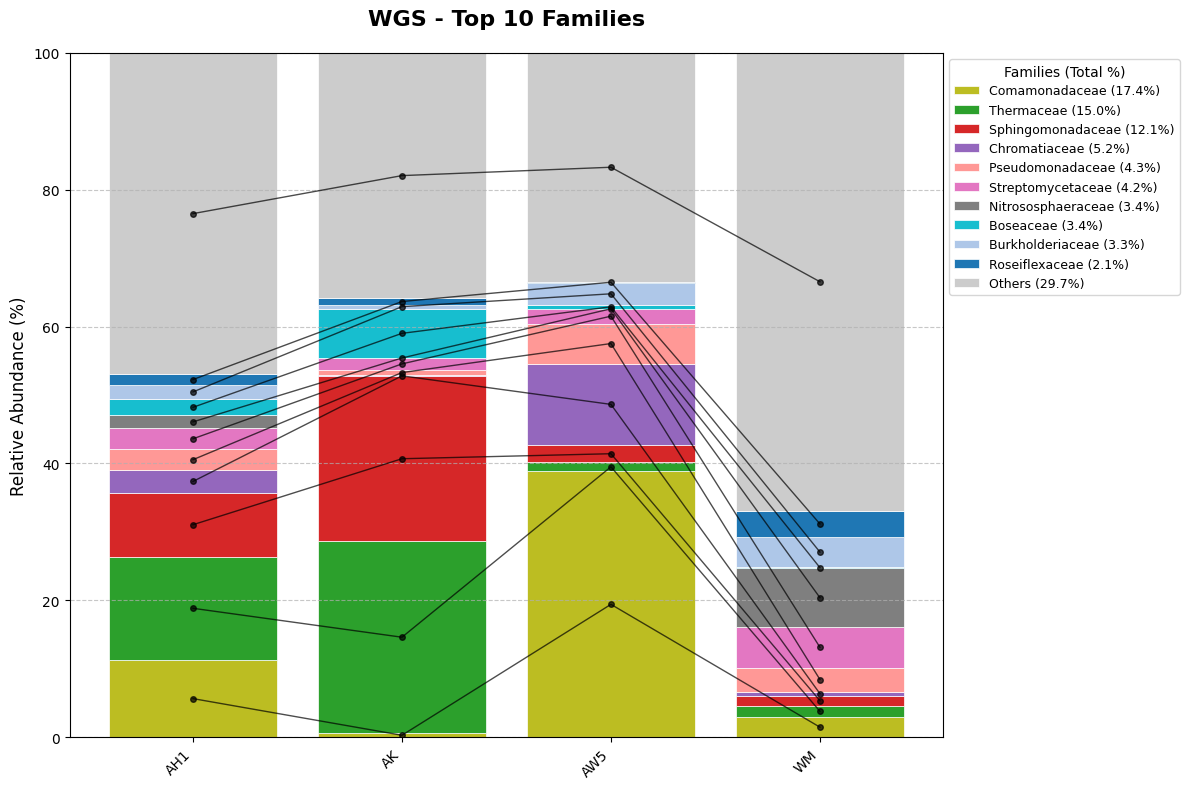


=== Family Comparison ===
Shared in Both: Thermaceae
Unique to 16S: Planococcaceae, Hydrogenophilaceae, Aminicenantales, uncultured, Acetothermiia, Fervidobacteriaceae, Methylohalobiaceae, Kryptoniaceae
Unique to WGS: Roseiflexaceae, Sphingomonadaceae, Boseaceae, Streptomycetaceae, Burkholderiaceae, Comamonadaceae, Pseudomonadaceae, Nitrososphaeraceae, Chromatiaceae


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Family.txt'  # Changed to Family file
file_path_wgs = 'WGS_Family.txt'  # Changed to Family file
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_families(df, top_n=10):  # Changed to get_top_families
    """Extract top Families and ignore 'Unclassified'/'Others' for color assignment."""
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False)
    top_families = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_families if p not in ['Unclassified', 'Others']]

# Get Families from both datasets
top_16s = get_top_families(df_16s)  # Changed to top_families
top_wgs = get_top_families(df_wgs)   # Changed to top_families
all_families = list(set(top_16s + top_wgs))  # Unique Families

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, family in enumerate(all_families):  # Changed to family
    color_mapping[family] = colors_20[i % len(colors_20)]  # Cycle through colors
color_mapping['Others'] = '#CCCCCC'  # Force gray for "Others"
color_mapping['Unclassified'] = '#999999'  # Dark gray for "Unclassified"

def plot_stacked_bar_with_lines(df, title, color_mapping, top_n=10):
    df['Total'] = df.iloc[:, 1:].sum(axis=1)
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1:-1].sum()
    others_row = pd.DataFrame([['Others'] + others_sum.tolist() + [others_sum.sum()]], columns=df.columns)
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot.iloc[:, 1:-1] = df_plot.iloc[:, 1:-1].apply(lambda x: x / x.sum() * 100, axis=0)
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    samples = df.columns[1:-1]
    x_pos = np.arange(len(samples))
    bottom = np.zeros(len(samples))

    # Create a dictionary to store the y positions for each family
    y_positions = {}

    for _, row in df_plot.iterrows():
        color = color_mapping.get(row['Name'], '#CCCCCC')
        values = row[samples]
        ax.bar(
            x_pos, values, bottom=bottom,
            label=row['Legend Label'],
            color=color,
            edgecolor='white',
            linewidth=0.5,
            width=0.8
        )

        # Store the top y positions for each family
        y_positions[row['Name']] = bottom + values/2  # Using middle of each bar for line placement

        bottom += values

    # Add connecting lines for each family
    for family, y_vals in y_positions.items():
        ax.plot(x_pos, y_vals,
                color='black',
                linestyle='-',
                linewidth=1,
                marker='o',
                markersize=4,
                alpha=0.7)

    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.set_ylabel('Relative Abundance (%)', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, title='Families (Total %)', fontsize=9)  # Changed to Families
    plt.tight_layout()
    plt.show()

# Generate plots with lines
plot_stacked_bar_with_lines(df_16s.copy(), '16S - Top 10 Families', color_mapping)  # Changed title
plot_stacked_bar_with_lines(df_wgs.copy(), 'WGS - Top 10 Families', color_mapping)   # Changed title

# Comparison summary
common_families = set(top_16s).intersection(top_wgs)  # Changed to common_families
unique_to_16s = set(top_16s) - set(top_wgs)         # Changed to unique_to_16s
unique_to_wgs = set(top_wgs) - set(top_16s)         # Changed to unique_to_wgs

print("\n=== Family Comparison ===")  # Changed to Family Comparison
print(f"Shared in Both: {', '.join(common_families) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")

#AH1

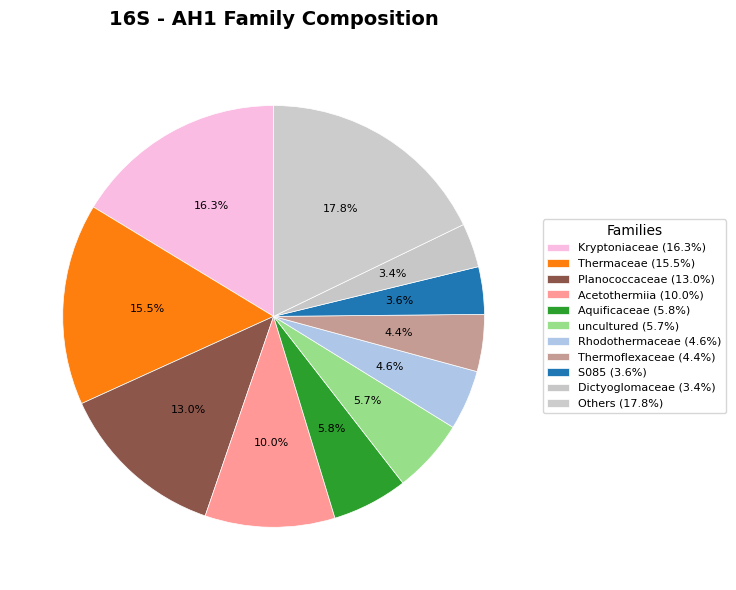

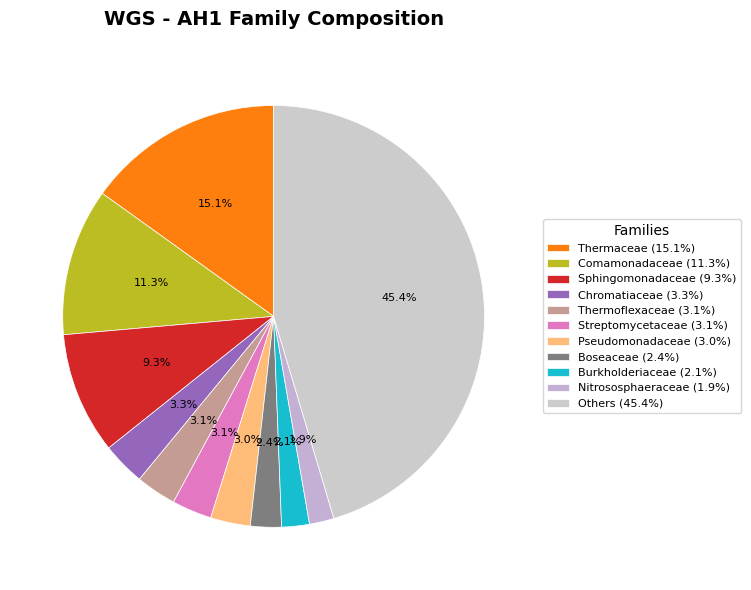


=== Family Comparison for AH1 ===
Shared in Both: Thermoflexaceae, Thermaceae
Unique to 16S: S085, Kryptoniaceae, Aquificaceae, Planococcaceae, Rhodothermaceae, Acetothermiia, uncultured, Dictyoglomaceae
Unique to WGS: Sphingomonadaceae, Boseaceae, Streptomycetaceae, Burkholderiaceae, Comamonadaceae, Pseudomonadaceae, Nitrososphaeraceae, Chromatiaceae


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

file_path_16s = '16s_Family.txt'
file_path_wgs = 'WGS_Family.txt'
df_16s = load_data(file_path_16s)
df_wgs = load_data(file_path_wgs)

# Your custom colors (20 distinct colors)
colors_20 = [
    (0.121, 0.466, 0.705, 1.0),  # Blue
    (1.000, 0.498, 0.054, 1.0),  # Orange
    (0.172, 0.627, 0.172, 1.0),  # Green
    (0.839, 0.153, 0.157, 1.0),  # Red
    (0.580, 0.403, 0.741, 1.0),  # Purple
    (0.549, 0.337, 0.294, 1.0),  # Brown
    (0.890, 0.466, 0.760, 1.0),  # Pink
    (0.498, 0.498, 0.498, 1.0),  # Gray (reserved for "Others")
    (0.737, 0.741, 0.133, 1.0),  # Olive
    (0.090, 0.745, 0.811, 1.0),  # Cyan
    (0.682, 0.780, 0.909, 1.0),  # Light Blue
    (1.000, 0.733, 0.470, 1.0),  # Light Orange
    (0.596, 0.875, 0.541, 1.0),  # Light Green
    (1.000, 0.596, 0.588, 1.0),  # Light Red
    (0.772, 0.690, 0.835, 1.0),  # Lavender
    (0.769, 0.612, 0.580, 1.0),  # Rosy Brown
    (0.984, 0.737, 0.890, 1.0),  # Baby Pink
    (0.780, 0.780, 0.780, 1.0),  # Light Gray
    (0.890, 0.894, 0.482, 1.0),  # Yellow-Green
    (0.627, 0.843, 0.898, 1.0)   # Sky Blue
]

def get_top_families(df, sample_name, top_n=10):
    """Extract top Families for a specific sample and ignore 'Unclassified'/'Others' for color assignment."""
    df = df[['Name', sample_name]].copy()
    df['Total'] = df[sample_name]
    df_sorted = df.sort_values('Total', ascending=False)
    top_families = df_sorted.head(top_n)['Name'].tolist()
    return [p for p in top_families if p not in ['Unclassified', 'Others']]

# Get Families from both datasets for AH1 sample
sample_name = 'AH1'
top_16s = get_top_families(df_16s, sample_name)
top_wgs = get_top_families(df_wgs, sample_name)
all_families = list(set(top_16s + top_wgs))  # Unique Families

# Assign colors (skip gray, reserved for "Others")
color_mapping = {}
for i, family in enumerate(all_families):
    color_mapping[family] = colors_20[i % len(colors_20)]
color_mapping['Others'] = '#CCCCCC'
color_mapping['Unclassified'] = '#999999'

def plot_single_sample(df, sample_name, title, color_mapping, top_n=10):
    """Plot a single sample's family composition."""
    df = df[['Name', sample_name]].copy()
    df['Total'] = df[sample_name]
    df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)
    df_top = df_sorted.head(top_n)

    others_sum = df_sorted.iloc[top_n:, 1].sum()
    others_row = pd.DataFrame([['Others', others_sum, others_sum]], columns=['Name', sample_name, 'Total'])
    df_plot = pd.concat([df_top, others_row], ignore_index=True)

    df_plot[sample_name] = df_plot[sample_name] / df_plot[sample_name].sum() * 100
    df_plot['Legend Label'] = df_plot.apply(
        lambda row: f"{row['Name']} ({row['Total'] / df_plot['Total'].sum() * 100:.1f}%)",
        axis=1
    )

    fig, ax = plt.subplots(figsize=(8, 6))
    families = df_plot['Name']
    abundances = df_plot[sample_name]

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        abundances,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=[color_mapping.get(f, '#CCCCCC') for f in families],
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
        textprops={'fontsize': 8}
    )

    ax.set_title(title, fontsize=14, weight='bold', pad=20)
    ax.legend(
        wedges,
        df_plot['Legend Label'],
        title='Families',
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=8
    )
    plt.tight_layout()
    plt.show()

# Generate plots for AH1 sample
plot_single_sample(df_16s.copy(), sample_name, f'16S - {sample_name} Family Composition', color_mapping)
plot_single_sample(df_wgs.copy(), sample_name, f'WGS - {sample_name} Family Composition', color_mapping)

# Comparison summary
common_families = set(top_16s).intersection(top_wgs)
unique_to_16s = set(top_16s) - set(top_wgs)
unique_to_wgs = set(top_wgs) - set(top_16s)

print("\n=== Family Comparison for AH1 ===")
print(f"Shared in Both: {', '.join(common_families) or 'None'}")
print(f"Unique to 16S: {', '.join(unique_to_16s) or 'None'}")
print(f"Unique to WGS: {', '.join(unique_to_wgs) or 'None'}")